<a href="https://colab.research.google.com/github/milorico/KDD2020-01/blob/master/KDD_Project_UNAB_2020_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aplicacion de la metodología CRISP-DM para descubrir conocimiento  en la información de Airbnb en anuncios de hospedaje para Amsterdam y Berlin 2020 - 2021**

# Introducción

CRISP-DM, proporciona una representación para la mineria de datos como se hace en la industria del software con los modelos de ciclo vital en el desarrollo de software. El modelo CRISP-DM cubre las fases de un proyecto, como un modelo de procesos, es un metodo probado para orientar proyectos de este tipo, en donde se hara mineria de datos. 

Compararemos las tendencias de Airbnb entre Amsterdam y Berlin durante un periodo de extension de un año, abril 2020 - 2021. Examinaremos las diferencias entre los listados y las tendencias anuales entre las dos ciudades europeas.



# Comprensión del negocio

Los tipos de datos disponibles para la realizacion del proyecto son de origen de InsideAirbnb, una iniciativa de Airbnb para permitirle a todo publico acceder y descargar informacion sobre las ofertas y reseñas en su sistema clasificadas para diferentes ciudades alrededor del mundo. Especificamente para este proyecto, utilizaremos dos archivos para cada ciudad, Listing.csv y Calendar.csv, los cuales contienen informacion sobre precios, disponiblidad, tamaño, ubicacion, anfitrion y otros datos sobre cada oferta. 

Para el desarrollo de este proyecto, utilizaremos herramientas online como google Collab, las cuales nos facilitan el montaje y ejecucion de los modelos, asi mismo, la creacion de un cuaderno para entablar una conversacion con el lector mientras se aprecian las graficas, ejecuta los codigos y se sacan conclusiones.

El negocio del hospedaje para turismo o celebraciones se ha modernizado notablemente rapido a comparacion de otro tipo de servicios. Gracias a esto, herramientas como Airbnb, Trivago, googleFlights, permiten a sus usuario apreciar diferentes ofertas con sus especificaciones e imagenes ilustrativas, acomodaciones y demas, queremos saber que ciudad de las dos escogidas ofrece acomodaciones a mejores precios considerando una media baja y otra alta ya que las acomodaciones que ofrece la herramienta son altamente variadas y enfocadas a dos publicos objetivos diferentes previamente mencionados, es por eso que con la ayuda de calculos estadisticos y herramientas graficadoras analizaremos las ofertas de cada ciudad para ofrecer respuestas a las preguntas de investigacion planteadas. 

Las preguntas planteadas para encontrar diferencias entre las  ofertas publicadas en Airbnb para las dos ciudades son: ¿Hay diferencias en los tipos y tamaños de los hospedajes ofrecidos en Airbnb entre Amsterdam y Berlin? ¿Existen diferencias en los servicios ofrecidos? ¿Las diferencias de tipo y tamaño se traducen en diferencias de precio de los hospedajes?

Unas preguntas exploratorias se deben hacer para encontrar diferencias en el comportamiento de las tendencias de precios y disponibilidad de Airbnb, estas son: ¿Hay diferencias en la disponibilidad y las tendencias de precios a lo largo del año? ¿Hay algunas temporadas más disponibles y/o menos costosas a lo largo de la temporada? ¿Cuáles son las mejores épocas para visitar cada ciudad en términos de precio y disponibilidad? ¿Existen diferencias en los picos de precios en los fines de semana y días festivos?



# Comprensión de los datos


**Configuracion Inicial**

In [0]:

import numpy as np
import datetime
from scipy import stats

# Setup pandas
import pandas as pd
pd.plotting.register_matplotlib_converters()  # plotting of dates by pandas
pd.set_option('display.max_columns', 100)  # allow to view all columns in the notebook
from IPython.display import display

# Setup visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

SMALL_SIZE = 12
MEDIUM_SIZE = 14
LARGE_SIZE = 16
plt.rc('font', size=SMALL_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)  # fontsize of the figure title

RANDOM_STATE = 42

**Cargamos la información**

In [88]:
calendar = pd.read_csv('/content/Amsterdam/calendar.csv', nrows=3)
calendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,52490,2020-03-14,f,$75.00,$75.00,2,80
1,2818,2020-03-14,f,$69.00,$69.00,3,1125
2,2818,2020-03-15,t,$69.00,$69.00,3,1125


In [89]:

listings = pd.read_csv('/content/Amsterdam/listings.csv', nrows=3)
listings

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,...,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20200313233926,2020-03-14,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",From week 38 to week 47 maintenance work to th...,The neighbourhood is well served by 24 hours p...,NaN,NaN,Please: - Leave your shoes in the entrance - ...,NaN,NaN,https://a0.muscache.com/im/pictures/10272854/8...,NaN,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands","Upon arriving in Amsterdam, one can imagine as...",within an hour,100%,100%,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1,1,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Amsterdam, North Holland, Netherlands",Indische Buurt,Oostelijk Havengebied - Indische Buurt,NaN,Amsterdam,North Holland,NaN,Amsterdam,"Amsterdam, Netherlands",NL,Netherlands,52.36575,4.94142,...,2,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",NaN,$59.00,NaN,"$1,500.00",$200.00,$60.00,1,$20.00,3,15,3,3,1125,1125,3.0,1125.0,2 weeks ago,t,17,32,62,81,2020-03-14,278,28,2009-03-30,2020-02-14,98,10,10,10,10,9,10,f,NaN,"{Amsterdam,"" NL Zip Codes 2"","" Amsterdam"","" NL""}",t,f,strict_14_with_grace_period,f,f,1,0,1,0,2.08
1,20168,https://www.airbnb.com/rooms/20168,20200313233926,2020-03-14,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,For those who like all facets of city life. In...,17th century Dutch townhouse in the heart of t...,none,Located just in between famous central canals....,Check-in time from 2pm till 10pm (But it doesn...,No need to use any transport! All is within a ...,NaN,"No curfew, free entrance 27/7 with your own ke...",This studio/room takes entire floor and has it...,NaN,NaN,https://a0.muscache.com/im/pictures/69979664/3...,NaN,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",Secondary phone nr. + (Phone number hidden by ...,within an hour,100%,96%,f,https://a0.muscache.com/im/pictures/user/579c8...,https://a0.muscache.com/im/pictures/user/579c8...,Grachtengordel,2,2,"['email', 

In [0]:

listings_keep_cols = ['id', 'experiences_offered', 'property_type', 'room_type', 'accommodates', 
                      'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet']

In [91]:
def convert_currency(val):
    """Reformat currency string '$x,xxx.xx' to float.
    
    Notes:
        Treat all values that do not start with '$' as invalid and mark as np.nan
    
    Args:
        val (str): string currency value
        
    Returns:
        float: input convertic to numeric value
    """
    if isinstance(val, str) and val.startswith('$'):
        return float(val.replace('$', '').replace(',', ''))
    else:
        return np.nan


def convert_t_f(val):
    """Reformat 't' 'f' strings indicating boolean True/False to 1/0
    Args:
        val (str): string 't' / 'f' values
        
    Returns:
        1 if val=='t', 0 if val=='f', np.nan otherwise
    """
    if not isinstance(val, str) or not val:
        return np.nan
    elif val == 't':
        return 1
    else:
        return 0

# Test conversion functions
calendar = pd.read_csv('/content/Amsterdam/calendar.csv', nrows=5, 
                       parse_dates=['date'], infer_datetime_format=True,
                       converters={'available': convert_t_f, 
                                   'price': convert_currency})
calendar


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,52490,2020-03-14,0,75.0,$75.00,2,80
1,2818,2020-03-14,0,69.0,$69.00,3,1125
2,2818,2020-03-15,1,69.0,$69.00,3,1125
3,2818,2020-03-16,1,59.0,$59.00,3,1125
4,2818,2020-03-17,1,59.0,$59.00,3,1125


Ahora estamos listos para cargar los conjuntos de datos.

In [0]:
# Cities for which we perform analysis
cities = ['Amsterdam', 'Berlin']

# Load
# - date columns as datetime
# - formatting price columns as floats
# - converting 't' / 'f' to 1 / 0
# - labeling missing values as NaN

# Initialize dataframes
calendar = pd.DataFrame()
listings = pd.DataFrame()

# Load data for each city
for city in cities:
    path = '/content/' + city + '/'
    
    # load city calendar.csv
    cal = pd.read_csv(path + 'calendar.csv',
                      parse_dates=['date'], infer_datetime_format=True,
                      converters={'available': convert_t_f,
                                  'price': convert_currency})
    
    cal['city'] = city  # keep track where data came from for quick exploratory analysis
    
    calendar = pd.concat([calendar, cal], ignore_index=True)  # combine data from both cities

    # load city listings.csv
    li = pd.read_csv(path + 'listings.csv', usecols=listings_keep_cols, na_values=['none'])
    
    li['city'] = city  # keep track where data came from for quick exploratory analysis
    
    listings = pd.concat([listings, li], ignore_index=True)  # combine data from both cities


In [93]:
calendar.sample(3, random_state=RANDOM_STATE)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,city
3747825,19414235,2020-07-30,0,120.0,$120.00,30.0,60.0,Amsterdam
4258153,21633099,2020-11-24,0,118.0,$118.00,3.0,30.0,Amsterdam
6926108,41497651,2020-09-15,0,115.0,$115.00,1.0,2.0,Amsterdam


In [94]:
listings.sample(3, random_state=RANDOM_STATE)

,id,experiences_offered,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,city
27402,14073167,NaN,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,""Hot tub"",""Buzzer/wireless inter...",NaN,Berlin
24307,8097085,NaN,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",NaN,Berlin
3581,7198483,NaN,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{Wifi,Kitchen,""Pets live on this property"",Cat...",NaN,Amsterdam


**Examinamos los datos**

In [95]:
calendar.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16351640 entries, 0 to 16351639
Data columns (total 8 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       int64         
 3   price           float64       
 4   adjusted_price  object        
 5   minimum_nights  float64       
 6   maximum_nights  float64       
 7   city            object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 998.0+ MB


In [96]:
calendar.describe(include='all')

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,city
count,1.635164e+07,16351640,1.635164e+07,1.635146e+07,16351455,1.635164e+07,1.635164e+07,16351640
unique,NaN,369,NaN,NaN,1343,NaN,NaN,2
top,NaN,2020-07-05 00:00:00,NaN,NaN,$50.00,NaN,NaN,Berlin
freq,NaN,44799,NaN,NaN,503199,NaN,NaN,9184860
first,NaN,2020-03-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2021-03-16 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.095889e+07,NaN,1.721673e-01,1.195270e+02,NaN,5.617887e+00,1.913539e+05,NaN
std,1.236651e+07,NaN,3.775258e-01,2.275401e+03,NaN,2.252899e+01,2.023546e+07,NaN
min,2.818000e+03,NaN,0.000000e+00,6.000000e+00,NaN,1.000000e+00,1.000000e+00,NaN
25%,1.049607e+07,NaN,0.000000e+00,4.600000e+01,NaN,2.000000e+00,2.200000e+01,NaN


In [97]:
calendar.isna().mean()

listing_id        0.000000e+00
date              0.000000e+00
available         0.000000e+00
price             1.131385e-05
adjusted_price    1.131385e-05
minimum_nights    1.834678e-07
maximum_nights    1.834678e-07
city              0.000000e+00
dtype: float64

Observamos que más del 70% de las entradas no tienen información de precios. Nos encargaremos de los valores que faltan a continuación.

Ahora, veamos el histograma de fechas que se encuentra en el calendario:

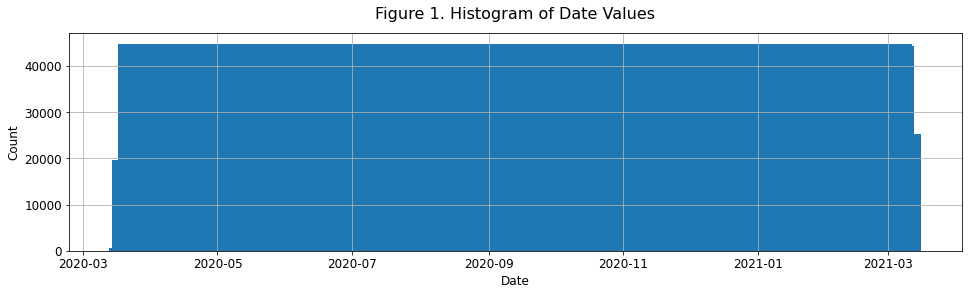

In [98]:
fig1, ax1 = plt.subplots(figsize=(16, 4))
ax1 = calendar.date.hist(bins=calendar.date.nunique(), ax=ax1)
ax1.set_title('Figure 1. Histogram of Date Values', fontsize=16, y=1.04)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Count', fontsize=12);


We see that there appear to be fewer number of listings for dates at the beginning and the end of the date interval (beginning of October of 2018 and beginning of October of 2019). Going back to data source we notice that Los Angeles and New York calendar data sets start and end on slightly different days. We will drop the mismatched dates since they do no influence overall general trends below.

Next we examine the distibution of listing prices found in the calendar dataset.

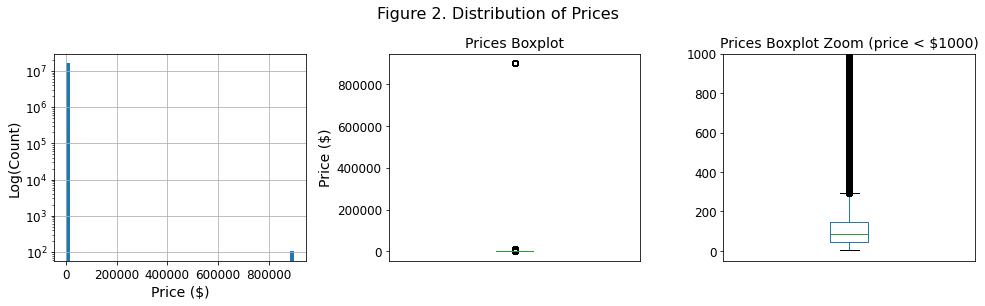

In [99]:
price_zoom = 1000

fig2, axes2 = plt.subplots(1, 3, figsize=(14, 4))

axes2[0] = calendar.price.hist(bins=50, ax=axes2[0], log=True)
axes2[0].set_xlabel('Price ($)')
axes2[0].set_ylabel('Log(Count)')

axes2[1] = calendar.price.plot.box(ax=axes2[1])
axes2[1].set_title('Prices Boxplot')
axes2[1].set_ylabel('Price ($)')

axes2[2], prices_bp = calendar.price.plot.box(return_type='both', ax=axes2[2])
axes2[2].set_title(f'Prices Boxplot Zoom (price < ${price_zoom})')
axes2[2].set_ylim(-50, price_zoom)

# hide x-axis title on boxplots
for ax in axes2[1:]:
    x_axis = ax.axes.get_xaxis()
    x_axis.set_visible(False)

fig2.tight_layout()
fig2.suptitle('Figure 2. Distribution of Prices', y=1.06);

We can from the boxplot of the prices above (center plot) and the zoom of the same plot (right) that there is a large number of outlier prices going into tens of thousands of dollars per night. It makes sense to subdivide the listings into two groups: high and low median priced. We will explore these more closely and deal with them below.

listings:
Now that we have examined the calendar data, we move onto listings data:

In [100]:
listings.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44799 entries, 0 to 44798
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   44799 non-null  int64  
 1   experiences_offered  0 non-null      float64
 2   property_type        44799 non-null  object 
 3   room_type            44799 non-null  object 
 4   accommodates         44799 non-null  int64  
 5   bathrooms            44775 non-null  float64
 6   bedrooms             44747 non-null  float64
 7   beds                 44502 non-null  float64
 8   bed_type             44799 non-null  object 
 9   amenities            44799 non-null  object 
 10  square_feet          753 non-null    float64
 11  city                 44799 non-null  object 
dtypes: float64(5), int64(2), object(5)
memory usage: 4.1+ MB


In [101]:
listings.describe(include='all')

,id,experiences_offered,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,city
count,4.479900e+04,0.0,44799,44799,44799.000000,44775.000000,44747.000000,44502.000000,44799,44799,753.000000,44799
unique,NaN,NaN,40,4,NaN,NaN,NaN,NaN,5,41197,NaN,2
top,NaN,NaN,Apartment,Entire home/apt,NaN,NaN,NaN,NaN,Real Bed,{},NaN,Berlin
freq,NaN,NaN,37195,28273,NaN,NaN,NaN,NaN,44013,77,NaN,25164
mean,2.095889e+07,NaN,NaN,NaN,2.768276,1.142580,1.290165,1.683587,NaN,NaN,515.334661,NaN
std,1.236664e+07,NaN,NaN,NaN,1.474832,0.371978,0.793902,1.317112,NaN,NaN,523.352473,NaN
min,2.818000e+03,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN
25%,1.049644e+07,NaN,NaN,NaN,2.000000,1.000000,1.000000,1.000000,NaN,NaN,0.000000,NaN
50%,2.022337e+07,NaN,NaN,NaN,2.000000,1.000000,1.000000,1.000000,NaN,NaN,452.000000,NaN
75%,3.129770e+07,NaN,NaN,NaN,4.000000,1.000000,2.000000,2.000000,NaN,NaN,775.000000,NaN


In [102]:
listings.isna().mean()

id                     0.000000
experiences_offered    1.000000
property_type          0.000000
room_type              0.000000
accommodates           0.000000
bathrooms              0.000536
bedrooms               0.001161
beds                   0.006630
bed_type               0.000000
amenities              0.000000
square_feet            0.983192
city                   0.000000
dtype: float64


Note that data for the experiences_offered feature is missing entirely, so we can safely drop it. Additionally, there is less than 1% of data is available for the square_feet feature. Since most of the data is missing and there are several other size related listing features, we can drop square_feet feature as well.

bathrooms, bedrooms, and beds features are missing <0.1% of row values. Since the proportion of missing data is small, we will drop the listings with missing values for these features our analysis.

Now, let's examine the value distributions for listings numerical features:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  This is separate from the ipykernel package so we can avoid doing imports until


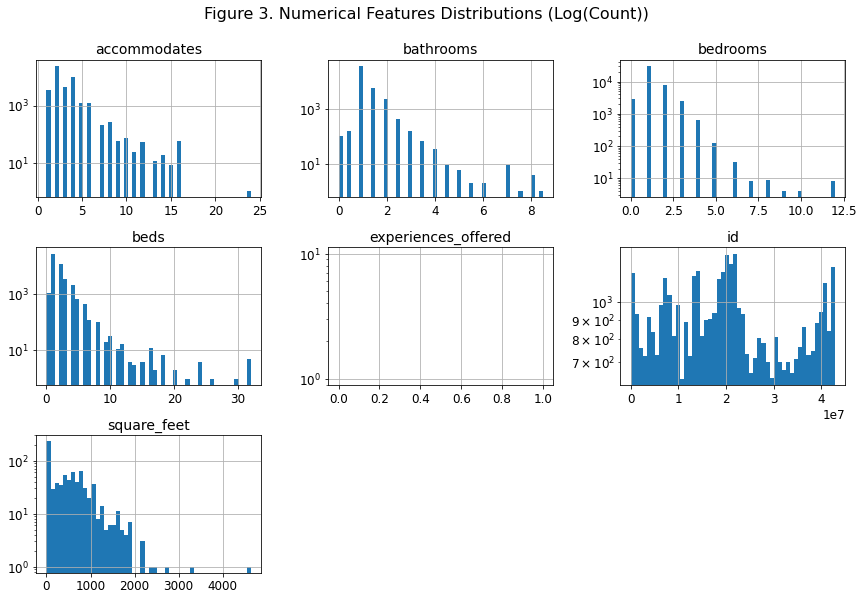

In [103]:
listings.select_dtypes(include=np.number).hist(figsize=(12, 8), bins=50, log=True)
plt.gcf().suptitle('Figure 3. Numerical Features Distributions (Log(Count))', y=1.04)
plt.gcf().tight_layout();


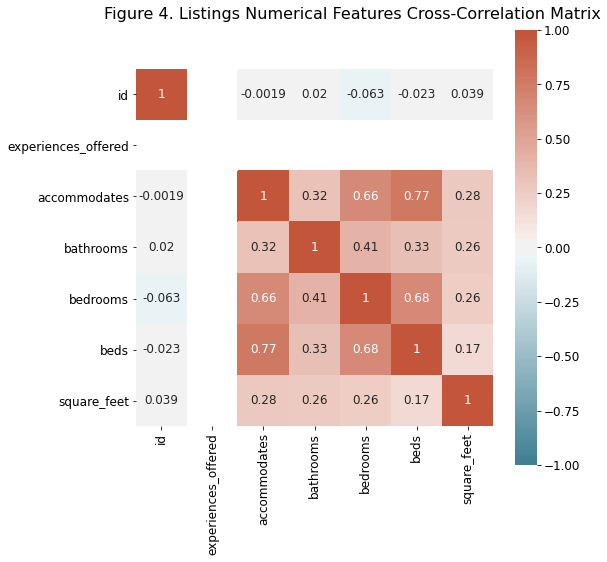

In [104]:
fig4, ax4 = plt.subplots(figsize=(8, 8))
ax4 = sns.heatmap(listings.select_dtypes(include=np.number).corr(), ax=ax4,
                  vmin=-1, vmax=1, center=0, annot=True, square=True,
                  cmap=sns.diverging_palette(220, 20, n=200))
fig4.suptitle('Figure 4. Listings Numerical Features Cross-Correlation Matrix', y=0.92);

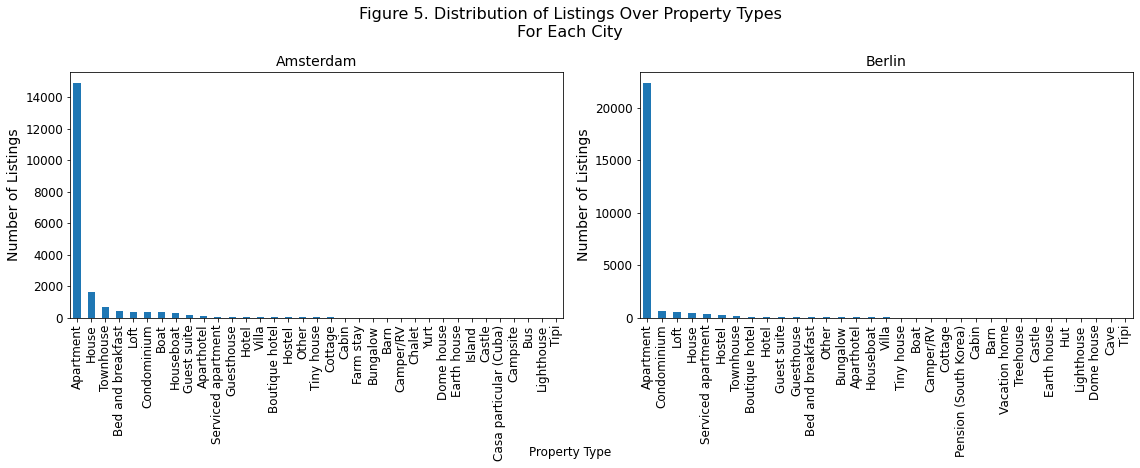

In [105]:

# get sorted by count listings for each property type
property_types = listings.groupby(['city', 'property_type'])\
                         .agg(num_listings=('id', 'count'))\
                         .reset_index()\
                         .sort_values('num_listings', ascending=False)


fig5, ax5 = plt.subplots(1, 2, figsize=(16, 6))

for ax, city in zip(ax5, cities):
    property_types[property_types.city==city].plot(x='property_type', y='num_listings',
                                                   kind='bar', ax=ax, legend=False);
    ax.set_title(city.title())
    ax.set_ylabel('Number of Listings')
ax5[0].set_xlabel('')
ax5[1].set_xlabel('')
fig5.suptitle(f'Figure 5. Distribution of Listings Over Property Types\n'
              f'For Each City', y=1.08)
fig5.text(0.5, 0.04, 'Property Type', ha='center')
fig5.tight_layout();

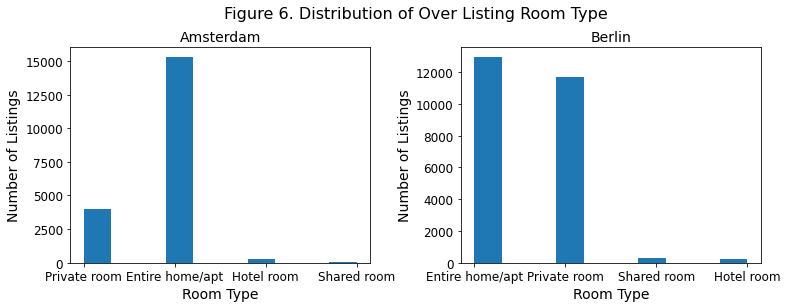

In [106]:
listings.room_type.sort_index().hist(by=listings.city, xrot=0.1, figsize=(12, 4))
for ax in plt.gcf().axes:
    ax.set_xlabel('Room Type')
    ax.set_ylabel('Number of Listings')
plt.gcf().suptitle('Figure 6. Distribution of Over Listing Room Type', y=1.04);

In [107]:
listings.amenities.head()

0    {Internet,Wifi,"Paid parking off premises","Bu...
1    {TV,Internet,Wifi,"Paid parking off premises",...
2    {TV,"Cable TV",Internet,Wifi,Kitchen,Elevator,...
3    {TV,Internet,Wifi,Breakfast,Heating,"Smoke det...
4    {Internet,Wifi,"Pets live on this property",Ca...
Name: amenities, dtype: object

Data Understanding Summary
calendar

34,232,620 entries of 5 variables
Over 60\% of price entries are missing values
Non-normal distribution of prices skewed right with far outliers above \$20,000
Mismatched dates at date tailends between Los Angeles and New York where not all listings have entries
listings

93804 entries of 12 variables
experience_offered feature is missing all values
square_feet feature is missing > 99\% of all values
bathrooms, bedrooms, beds features are missing < 0.15\% of values
All numerical features are right-skewed with far outlier values
Significant cross-correlation (> 0.5) between accommodates, bathrooms, bedrooms, beds
String encoded amenities feature contains a mixed-formatted list of keywords and phrases

**Data Preparation**

Now that we have understanding of the types and quality of loaded data, we are going to prepare it for our analysis.

Before doing data cleaning and manipulation we save a copy of the raw data in case we mess up.

In [0]:
# Backup copy of raw datasets in case we mess up
cal_raw = calendar.copy()
listings_raw = listings.copy()

In [109]:
# drop dates where there either Los Angeles or New York data is not available
date_counts = calendar.groupby('date')['date'].agg('count')
drop_dates = date_counts[date_counts < date_counts.max()].index.values
print('Mismatched dates between Los Angeles and New York calendar datasets:\n', drop_dates)

Mismatched dates between Los Angeles and New York calendar datasets:
 ['2020-03-13T00:00:00.000000000' '2020-03-14T00:00:00.000000000'
 '2020-03-15T00:00:00.000000000' '2020-03-16T00:00:00.000000000'
 '2021-03-13T00:00:00.000000000' '2021-03-14T00:00:00.000000000'
 '2021-03-15T00:00:00.000000000' '2021-03-16T00:00:00.000000000']


In [0]:
calendar = calendar[~calendar.date.isin(drop_dates)]

In [111]:
calendar[calendar.price.isna()].sample(5, random_state=RANDOM_STATE)


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,city
784369,4470364,2020-10-06,0,NaN,NaN,1.0,60.0,Amsterdam
784392,4470364,2020-10-29,0,NaN,NaN,1.0,60.0,Amsterdam
784505,4470364,2021-02-19,0,NaN,NaN,1.0,60.0,Amsterdam
784461,4470364,2021-01-06,0,NaN,NaN,1.0,60.0,Amsterdam
784497,4470364,2021-02-11,0,NaN,NaN,1.0,60.0,Amsterdam


In [112]:
# check aif missing any listings were available for dates where price is missing
is_missing_price_always_unavailbale = pd.Series((calendar.available == 0) == (calendar.price.isna())).all()
print('All observations with missing prices correspond to unavailability (available=0) and vice versa' 
      if is_missing_price_always_unavailbale
      else 'Some observations with missing prices are listed as available')


Some observations with missing prices are listed as available


In [0]:
# Sum listing availability for each listing id
listing_availability = calendar.groupby(['listing_id']).agg(total_available=('available', 'sum'))\
        .reset_index()

# Find listing ids with 0 total availability
never_available_listings = listing_availability[listing_availability.total_available == 0]\
        .listing_id.values


In [114]:

print(f'Found {len(never_available_listings)} listings '
      f'({100.0 * len(never_available_listings) / len(calendar.listing_id.unique()):.2f}% of total) '
      f'that are never available.')

Found 23324 listings (52.06% of total) that are never available.


In [0]:
# drop never available listings from calendar data set
calendar = calendar[~calendar.listing_id.isin(never_available_listings)]

In [116]:
print(f'Cleaned calendar contains {len(calendar.index)} daily prices for'
      f' {calendar.listing_id.nunique()} unique listings.')

Cleaned calendar contains 7752475 daily prices for 21475 unique listings.


In [117]:
calendar_listing_ids = calendar.listing_id.unique()
calendar_listing_ids

array([    2818,    20168,   252080, ..., 42912684, 42915280, 42919150])

In [118]:
price_ave_df = calendar.groupby('listing_id').price.mean()\
                       .reset_index().rename(columns={'listing_id': 'id', 'price': 'price_ave'})
price_ave_df

,id,price_ave
0,2818,69.875346
1,3176,90.000000
2,3309,28.570637
3,7071,34.080332
4,9991,182.049861
...,...,...
21470,42924701,51.853186
21471,42925022,51.853186
21472,42925485,46.168975
21473,42925945,49.000000


In [119]:
listings = price_ave_df.merge(listings, on='id')
listings

,id,price_ave,experiences_offered,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,city
0,2818,69.875346,NaN,Apartment,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,Wifi,""Paid parking off premises"",""Bu...",NaN,Amsterdam
1,3176,90.000000,NaN,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",720.0,Berlin
2,3309,28.570637,NaN,Apartment,Private room,1,1.0,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets live on this property"",Ca...",0.0,Berlin
3,7071,34.080332,NaN,Apartment,Private room,2,1.0,1.0,2.0,Real Bed,"{Wifi,Heating,""Family/kid friendly"",Essentials...",NaN,Berlin
4,9991,182.049861,NaN,Apartment,Entire home/apt,7,2.5,4.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",NaN,Berlin
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21470,42924701,51.853186,NaN,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Smoking allowed"",...",NaN,Berlin
21471,42925022,51.853186,NaN,House,Private room,2,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Smoking allowed"",...",NaN,Berlin
21472,42925485,46.168975,NaN,Apartment,Private room,4,1.0,1.0,1.0,Real Bed,"{TV,Wifi,Kitchen,""Pets allowed"",Washer,Essenti...",NaN,Berlin
21473,42925945,49.000000,NaN,Apartment,Entire home/apt,4,1.0,0.0,1.0,Real Bed,"{TV,Wifi,Kitchen,Heating,Washer,Dryer,""Smoke d...",NaN,Berlin


In [0]:
listings = listings.set_index('id')


In [0]:
# drop columns with > 99% missing values
listings = listings.drop(columns=['experiences_offered', 'square_feet'])

In [0]:
listings = listings.dropna(subset=['bathrooms', 'bedrooms', 'beds'], axis=0, how='any')

In [123]:
# check for missing data
listings.isna().sum()

price_ave        0
property_type    0
room_type        0
accommodates     0
bathrooms        0
bedrooms         0
beds             0
bed_type         0
amenities        0
city             0
dtype: int64


print(f'Our cleansed datasets are:\n'
      f'Calendar dataset with {len(calendar.index)} observations of '
      f'{len(calendar.columns)} features for dates ranging from '
      f'{calendar.date.min().date()} to {calendar.date.max().date()}.\n'
      f'Listings dataset of {len(listings.index)} unique listing id\'s '
      f'with {len(listings.columns)} features.')

**Feature Engineering)**

In this section we generate features useful for exploratory analysis and modeling.

Listing price bins
Let's address the outliers in the distribution of listing prices (see Figure 2 above

In [124]:

outlier_prices = [flier.get_ydata() for flier in prices_bp["fliers"]][0]  # get outlier values from boxplot
print(f'Outlier prices threshold is ${outlier_prices.min():.2f}')

Outlier prices threshold is $294.00


In [0]:
price_agg = calendar.groupby(['listing_id', 'city'])\
                    .agg(days_available=('price', 'count'),
                         price_median=('price', 'median'),
                         price_mean=('price', 'mean'),
                         price_min=('price', 'min'),
                         price_max=('price', 'max')).reset_index()

# Price percent range for a given listing
price_agg['price_prange'] = 100.0 * (price_agg.price_max - price_agg.price_min) / price_agg.price_mean

In [126]:
price_agg.sample(3, random_state=RANDOM_STATE)


,listing_id,city,days_available,price_median,price_mean,price_min,price_max,price_prange
16337,36421213,Berlin,361,35.0,34.326870,19.0,42.0,67.002905
606,663697,Amsterdam,361,350.0,350.000000,350.0,350.0,0.000000
843,870150,Amsterdam,361,58.0,58.728532,35.0,100.0,110.678742


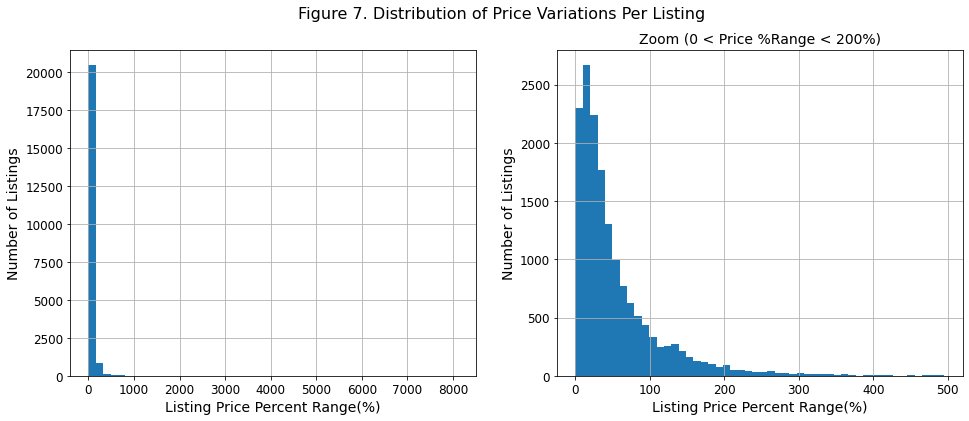

In [127]:
fig7, ax7 = plt.subplots(1, 2, figsize=(16, 6))

price_agg.price_prange.hist(ax=ax7[0], bins=50)
price_agg.price_prange[(price_agg.price_prange < 500) 
                       & (price_agg.price_prange > 0)].hist(ax=ax7[1], bins=50)

for ax in ax7:
    ax.set_ylabel('Number of Listings')
    ax.set_xlabel('Listing Price Percent Range(%)')
ax7[1].set_title('Zoom (0 < Price %Range < 200%)')
fig7.suptitle('Figure 7. Distribution of Price Variations Per Listing');

In [128]:
# proportion of listings with fixed price throughout the year
print(f'{100 * (price_agg.price_prange==0).mean():.2f}% of listings have fixed price throughout the year')

# Most frequent price % range for non-fixed price listings
print(f'Most frequent price range for non-fixed price listings is '
      f'{price_agg[price_agg.price_prange > 0].price_prange.mode()[0]:.2f}%')

# Median price % range for non-fixed price listings
print(f'Median price range for non-fixed price listings is '
      f'{price_agg[price_agg.price_prange > 0].price_prange.median():.2f}%')

# Mean price % range for non-fixed price listings
print(f'Mean price range for non-fixed price listings is '
      f'{price_agg[price_agg.price_prange > 0].price_prange.mean():.2f}%')

24.78% of listings have fixed price throughout the year
Most frequent price range for non-fixed price listings is 10.77%
Median price range for non-fixed price listings is 34.31%
Mean price range for non-fixed price listings is 59.65%


In [0]:
def iqr_outlier_boundary(arr, k=1.5):
    """Return interquantile range outlier (IQR) thresholds of the input numeric array 
    
    IQR = Qutntile 3 - Quantile 1
    lower threshold = Quntile 1 - k * IQR (outliers lie below lower threshold)
    upper threshold = Quantile 3 + k * IQR (outliers lie above upper threshold)
    
    Args:
        arr [num]: numeric array
        k (float): interquantile box length multiplier.  (Standard Tukey uses k=1.5)
        
    Returns:
        lower outlier threshold, upper outlier threshold
    """
    q1 = arr.quantile(0.25)
    q3 = arr.quantile(0.75)
    iqr = q3 - q1
    
    return (q1 - k * iqr, q3 + k * iqr)

In [130]:
# We do not need a lower outlier boundary since we're looking at high priced outliers
_, outlier_iqr1_5 = iqr_outlier_boundary(price_agg.price_median, 1.5)
_, outlier_iqr3 = iqr_outlier_boundary(price_agg.price_median, 3)

print(f'Tukey outlier boundary (k=1.5) is ${outlier_iqr1_5:.2f}')
print(f'Far outlier boundary (k=3) is ${outlier_iqr3:.2f}')

Tukey outlier boundary (k=1.5) is $315.00
Far outlier boundary (k=3) is $471.00


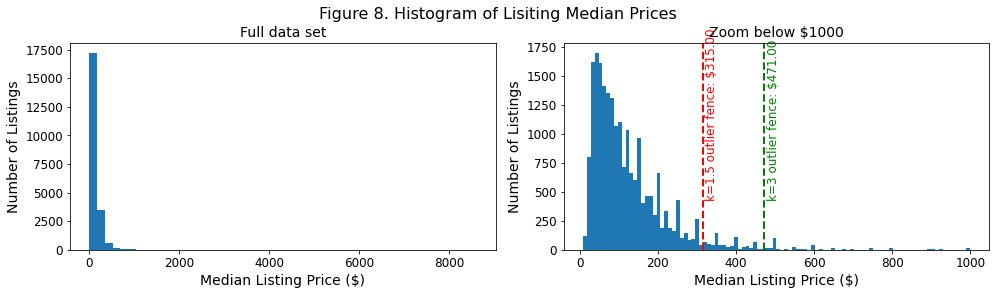

In [131]:
zoom_price = 1000  # Change graph scale to zoom in on the area of interest

fig8, ax8 = plt.subplots(1, 2, figsize=(14, 4))

# Plot full data set
ax8[0] = price_agg.price_median.hist(bins=50, ax=ax8[0], grid=False)
ax8[0].set_title ('Full data set')

# Plot subset of data with median price < zoom price
ax8[1] = price_agg[price_agg.price_median < zoom_price].price_median.hist(ax=ax8[1], bins=100, grid=False)
ax8[1].set_title(f'Zoom below ${zoom_price}')

# Add axis labels
for ax in ax8:
    ax.set_ylabel('Number of Listings')
    ax.set_xlabel('Median Listing Price ($)')

# Add marker for outlier thresholds
transform=ax8[1].get_xaxis_transform()
for k, cut, color in zip([1.5, 3], [outlier_iqr1_5, outlier_iqr3], ['r', 'g']):
    ax8[1].axvline(x=cut, color=color, linestyle='dashed', linewidth=2)
    plt.text(1.02 * cut, 0.25, f'k={k} outlier fence: ${cut:.2f}', 
             transform=transform, rotation=90, color=color)

fig8.suptitle('Figure 8. Histogram of Lisiting Median Prices', y=1.02)
fig8.tight_layout();

In [0]:
outlier_threshold = outlier_iqr3
price_bins = [f'median <= ${outlier_threshold}', f'median > ${outlier_threshold}']

In [133]:
# Listing_ids for listings with median price above outlier threshold
low_priced_listing_ids = price_agg[price_agg.price_median <= outlier_threshold].listing_id.values
high_priced_listing_ids = price_agg[price_agg.price_median > outlier_threshold].listing_id.values

# Add column indicating high/low priced listing bin in calendar and price_summary
calendar['listing_price_bin'] = np.where(calendar.listing_id.isin(low_priced_listing_ids), 
                                         price_bins[0], price_bins[1])
price_agg['listing_price_bin'] = np.where(price_agg.listing_id.isin(low_priced_listing_ids), 
                                          price_bins[0], price_bins[1])

print(f'There are {len(high_priced_listing_ids)} high priced listings '
      f'({100.0 * len(high_priced_listing_ids) / len(price_agg.index):.2f}% total) '
      f'with median price above ${outlier_threshold}')

There are 376 high priced listings (1.75% total) with median price above $471.0


In [134]:
# Show sample of data with high_priced feature
price_agg.groupby('listing_price_bin').apply(lambda x: x.sample(random_state=RANDOM_STATE))

,,listing_id,city,days_available,price_median,price_mean,price_min,price_max,price_prange,listing_price_bin
listing_price_bin,,,,,,,,,,
median <= $471.0,2653,4248769,Amsterdam,361,150.0,151.168975,90.0,170.0,52.920912,median <= $471.0
median > $471.0,17291,38170899,Amsterdam,361,699.0,675.301939,159.0,1012.0,126.313868,median > $471.0


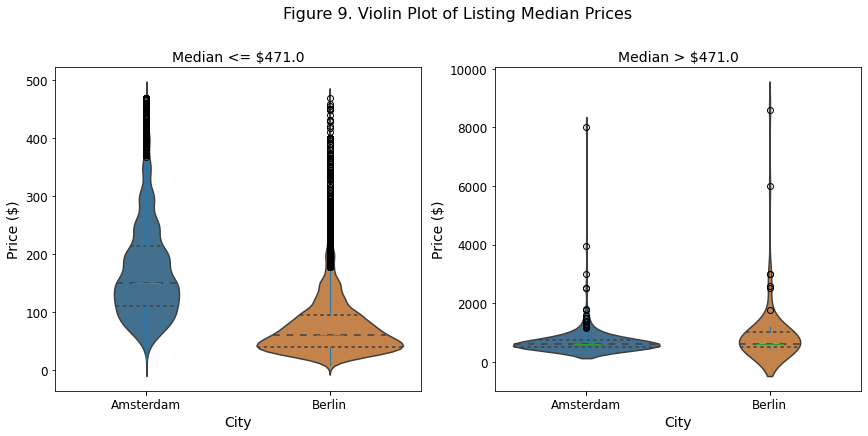

In [135]:
# Box plot 2 data subsets side to see outliers for each subset
fig9, ax9 = plt.subplots(1, 2, figsize=(14,6))

for ax, price_bin in zip(ax9, price_bins):
    df = price_agg[price_agg.listing_price_bin==price_bin]
    sns.violinplot(ax=ax, x='city', y='price_median', data= df, order=cities,
                   saturation=0.5, inner='quartile')
    df.boxplot(ax=ax, column='price_median', by='city', 
               grid=False, showbox=False, showcaps=False, positions=np.array([0, 1]))
    ax.set_title(price_bin.capitalize())
    ax.set_ylabel('Price ($)')
    ax.set_xlabel('City')
fig9.suptitle('Figure 9. Violin Plot of Listing Median Prices', y=1.04);

No handles with labels found to put in legend.


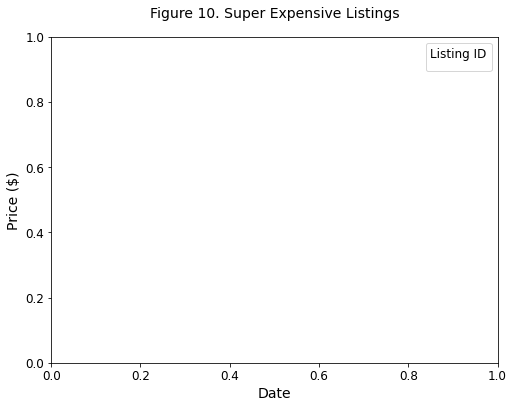

In [136]:
# Get super expensive listing ids
super_expensive_listing_ids = price_agg[price_agg.price_median > 20000].listing_id

# Time plot of prices throughout the year for super expensive listings
fig10, ax10 = plt.subplots(figsize=(8, 6))
for listing_id in super_expensive_listing_ids:
    calendar[calendar.listing_id==listing_id].plot(x='date', y='price', ax=ax10, label=listing_id,
                                                   legend=False)
ax10.set_title('Figure 10. Super Expensive Listings', y=1.04)
ax10.set_xlabel('Date')
ax10.set_ylabel('Price ($)')
ax10.legend(title='Listing ID');


In [0]:
# Drop extreme price outlier listings
calendar = calendar[~calendar.listing_id.isin(super_expensive_listing_ids)]
price_agg = price_agg[~price_agg.listing_id.isin(super_expensive_listing_ids)]

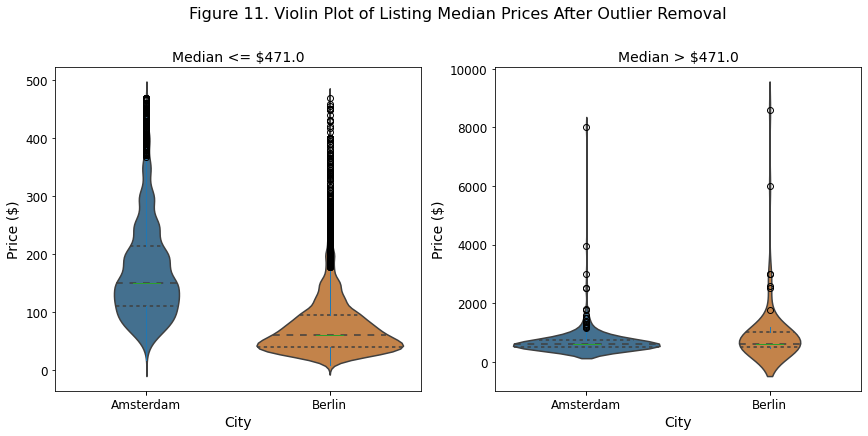

In [138]:
# Box plot 2 data subsets side to see outliers for each subset
fig11, ax11 = plt.subplots(1, 2, figsize=(14,6))

for ax, price_bin in zip(ax11, price_bins):
    df = price_agg[price_agg.listing_price_bin==price_bin]
    sns.violinplot(ax=ax, x='city', y='price_median', data= df, order=cities,
                   saturation=0.5, inner='quartile')
    df.boxplot(ax=ax, column='price_median', by='city', 
               grid=False, showbox=False, showcaps=False, positions=np.array([0, 1]))
    ax.set_title(price_bin.capitalize())
    ax.set_ylabel('Price ($)')
    ax.set_xlabel('City')
fig11.suptitle('Figure 11. Violin Plot of Listing Median Prices After Outlier Removal', y=1.04);

In [139]:
# Process amenities
amenities_df = listings.amenities.str.lower().str.strip('}{').str.replace('"', '')\
                                 .str.split(',').apply(pd.Series)\
                                 .stack().rename('value').reset_index() 
amenities_df = pd.crosstab(amenities_df.id, amenities_df.value).drop(columns=[''])

amenities_df.columns = [x.strip().replace(' ', '_') for x in amenities_df.columns.values]
amenities_df.head()

,toilet,24-hour_check-in,accessible-height_bed,accessible-height_toilet,air_conditioning,air_purifier,amazon_echo,baby_bath,baby_monitor,babysitter_recommendations,baking_sheet,balcony,barbecue_utensils,bath_towel,bathroom_essentials,bathtub,bathtub_with_bath_chair,bbq_grill,beach_essentials,beach_view,beachfront,bed_linens,bedroom_comforts,bidet,body_soap,bread_maker,breakfast,breakfast_table,building_staff,buzzer/wireless_intercom,cable_tv,carbon_monoxide_detector,cat(s),ceiling_fan,changing_table,children’s_books_and_toys,children’s_dinnerware,cleaning_before_checkout,coffee_maker,convection_oven,cooking_basics,crib,day_bed,disabled_parking_spot,dishes_and_silverware,dishwasher,dog(s),doorman,double_oven,dryer,...,private_hot_tub,private_living_room,projector_and_screen,rain_shower,refrigerator,room-darkening_shades,safety_card,self_check-in,shampoo,shower_chair,shower_gel,single_level_home,ski-in/ski-out,smart_lock,smart_tv,smoke_detector,smoking_allowed,soaking_tub,sound_system,stair_gates,stand_alone_steam_shower,standing_valet,steam_oven,step-free_shower,stove,suitable_for_events,sun_loungers,table_corner_guards,terrace,toilet_paper,translation_missing:_en.hosting_amenity_49,translation_missing:_en.hosting_amenity_50,trash_can,tv,walk-in_shower,warming_drawer,washer,washer/dryer,waterfront,well-lit_path_to_entrance,wheelchair_accessible,wide_clearance_to_shower,wide_doorway_to_guest_bathroom,wide_entrance,wide_entrance_for_guests,wide_entryway,wide_hallways,wifi,window_guards,wine_cooler
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2818,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3176,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3309,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7071,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9991,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,1,1,0,0,1,1,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [140]:
amenities_df.describe()


,toilet,24-hour_check-in,accessible-height_bed,accessible-height_toilet,air_conditioning,air_purifier,amazon_echo,baby_bath,baby_monitor,babysitter_recommendations,baking_sheet,balcony,barbecue_utensils,bath_towel,bathroom_essentials,bathtub,bathtub_with_bath_chair,bbq_grill,beach_essentials,beach_view,beachfront,bed_linens,bedroom_comforts,bidet,body_soap,bread_maker,breakfast,breakfast_table,building_staff,buzzer/wireless_intercom,cable_tv,carbon_monoxide_detector,cat(s),ceiling_fan,changing_table,children’s_books_and_toys,children’s_dinnerware,cleaning_before_checkout,coffee_maker,convection_oven,cooking_basics,crib,day_bed,disabled_parking_spot,dishes_and_silverware,dishwasher,dog(s),doorman,double_oven,dryer,...,private_hot_tub,private_living_room,projector_and_screen,rain_shower,refrigerator,room-darkening_shades,safety_card,self_check-in,shampoo,shower_chair,shower_gel,single_level_home,ski-in/ski-out,smart_lock,smart_tv,smoke_detector,smoking_allowed,soaking_tub,sound_system,stair_gates,stand_alone_steam_shower,standing_valet,steam_oven,step-free_shower,stove,suitable_for_events,sun_loungers,table_corner_guards,terrace,toilet_paper,translation_missing:_en.hosting_amenity_49,translation_missing:_en.hosting_amenity_50,trash_can,tv,walk-in_shower,warming_drawer,washer,washer/dryer,waterfront,well-lit_path_to_entrance,wheelchair_accessible,wide_clearance_to_shower,wide_doorway_to_guest_bathroom,wide_entrance,wide_entrance_for_guests,wide_entryway,wide_hallways,wifi,window_guards,wine_cooler
count,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,...,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.00000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000,21208.000000
mean,0.000613,0.066296,0.003772,0.001273,0.049793,0.000094,0.000047,0.029989,0.010562,0.030460,0.044559,0.000424,0.007827,0.002028,0.002122,0.112505,0.000047,0.040551,0.006601,0.000047,0.002169,0.461618,0.002122,0.000047,0.002028,0.003065,0.059977,0.000519,0.020181,0.147114,0.265089,0.315211,0.021266,0.000047,0.025934,0.091899,0.048472,0.036024,0.505847,0.000472,0.507403,0.075066,0.000236,0.001839,0.608261,0.350339,0.010373,0.003348,0.000047,0.312476,...,0.000047,0.177905,0.000047,0.000613,0.597605,0.076811,0.098689,0.101754,0.629810,0.000283,0.079074,0.112599,0.002452,0.010279,0.000519,0.657346,0.099066,0.000330,0.000424,0.013863,0.000094,0.000094,0.000047,0.003678,0.481799,0.018059,0.000047,0.003914,0.000236,0.002028,0.10496,0.135939,0.085817,0.647444,0.000613,0.000047,0.740853,0.000189,0.048708,0.013250,0.032016,0.000613,0.000519,0.001273,0.010656,0.001084,0.008912,0.971662,0.018201,0.000047
std,0.024751,0.248804,0.061303,0.035659,0.217521,0.009711,0.006867,0.170560,0.102230,0.171854,0.206338,0.020596,0.088127,0.044984,0.046016,0.315994,0.006867,0.197252,0.080982,0.006867,0.046523,0.498536,0.046016,0.006867,0.044984,0.055278,0.237451,0.022769,0.14062

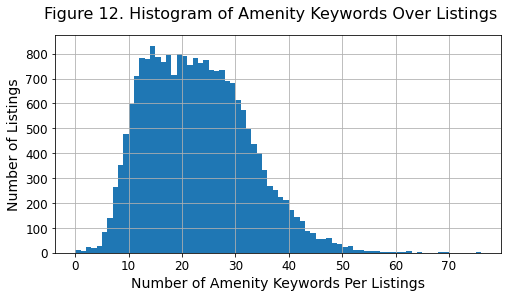

In [141]:
fig12, ax12 = plt.subplots(figsize=(8, 4))

amenities_df.sum(axis=1).hist(ax=ax12, bins=amenities_df.sum(axis=1).max())
ax12.set_xlabel('Number of Amenity Keywords Per Listings')
ax12.set_ylabel('Number of Listings')
fig12.suptitle('Figure 12. Histogram of Amenity Keywords Over Listings');

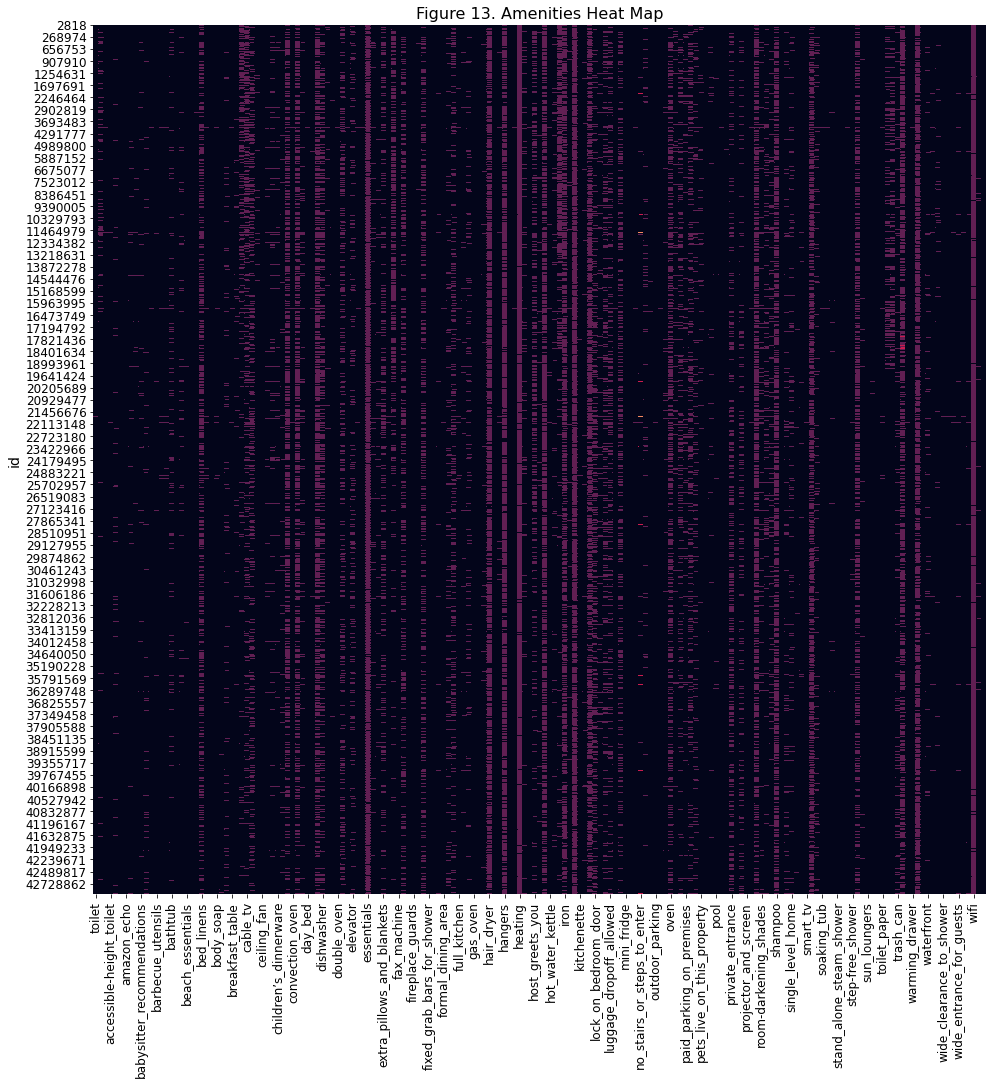

In [142]:
fig13, ax13 = plt.subplots(figsize=(16, 16))
ax13 = sns.heatmap(amenities_df, cbar=False)
ax13.set_title('Figure 13. Amenities Heat Map', fontsize=16);

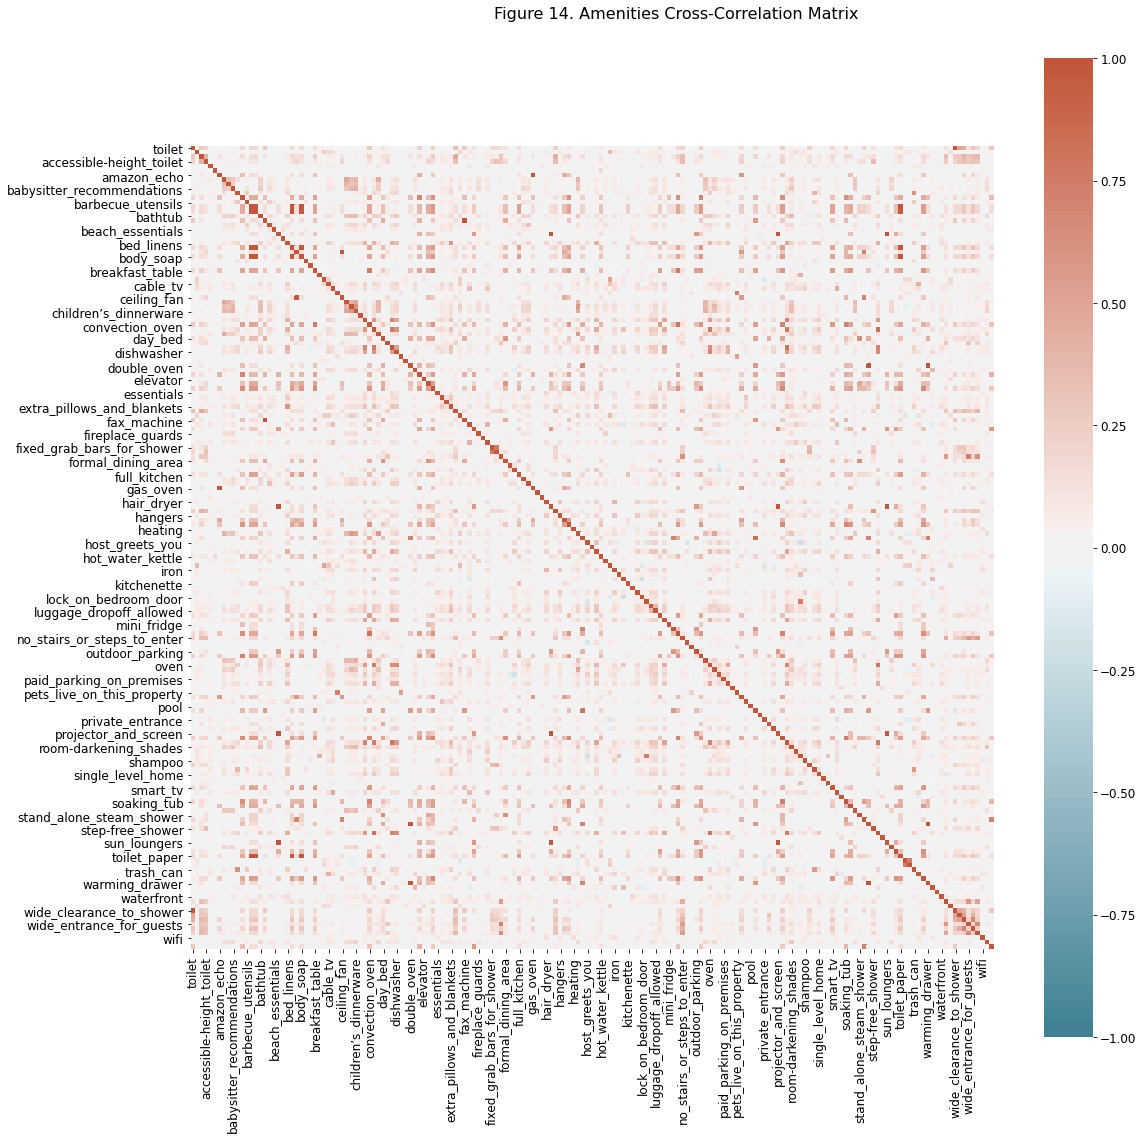

In [143]:
fig14, ax14 = plt.subplots(figsize=(18, 18))
ax14 = sns.heatmap(amenities_df.corr(), ax=ax14,
                   vmin=-1, vmax=1, annot=False, square=True,
                   cmap=sns.diverging_palette(220, 20, n=200))
fig14.suptitle('Figure 14. Amenities Cross-Correlation Matrix', y=0.92);

Data Preparation Summary
We have performed the following cleaning and feature engineering steps:

Delete missing/mismatched values
Drop mismatched dates between Los Angeles and New York calendars
Drop listings that were not available for the entire available time interval
Drop super-expensive listings above \$20,000 per night
Drop listings for which average listing price calculated using calendar data set is not available
Drop 0.2\% of listings with missing numerical feature values
Feature Engineering
listing_price_bin: Median listing price bin: listing median price <= \$564 and listing median price > \$564 for exploratory analysis
amenities: 197 features
Output:

calendar: clean data set containing daily availability and pricing per listing
listings: clean listings data with generated listing_price_bin and amenities features
Modeling and Evaluation
In this section we will perform exploratory analysis and price modeling to answer questions we have outlines in the Business Understanding section above.

For convenience for the entire section below we will define the level of granularity of the analysis by subgroup for each city and listing median price bins:

In [144]:
subgroups = ['city', 'listing_price_bin']
print('Sub-groups:', subgroups)
print('Price bins:', price_bins)

Sub-groups: ['city', 'listing_price_bin']
Price bins: ['median <= $471.0', 'median > $471.0']


In [0]:
# define which listing features we will examine
size_features = ['accommodates', 'bedrooms', 'bathrooms', 'beds']
type_features = ['property_type', 'room_type']
property_features = size_features + type_features


In [0]:
def category_level_pcount(df, column, subgroups, topk=None):
    """Return column category level count as percent of total count for each subgroup
    
    Args:
        df(pd.DataFrame): input dataframe
        column(str): column name for counting category level percentages
        subgroups([str]): list of subgrouping column names
        topk(int): return only topk results for each subgroup
        
    Returns:
        agg(pd.DataFrame): frame containing category level percent counts for each subgroup
    """
    # get subgroup counts
    subgroup_counts = df.groupby(subgroups)[column]\
                        .agg(subgroup_count=(column, 'count'))\
                        .reset_index()
    
    agg = df.groupby(subgroups + [column])[column]\
            .agg(level_count=(column, 'count'))\
            .reset_index()\
            .merge(subgroup_counts, on=subgroups)
    
    agg['level_pcount'] = 100.0 * agg.level_count / agg.subgroup_count
    
    if topk is not None:
        agg = agg.sort_values(subgroups + ['level_pcount'], ascending=False)\
                 .groupby(subgroups).head(topk).set_index(subgroups).reset_index()
    
    return agg

def is_equal_variance(d1, d2, alpha=0.05):
    """Performs stats.levene test on two input distributions.
    
    Args:
        d1, d2(np.array): input distributions
    
    Returns:
        (bool): true if variances between input distributions are equal, false otherwise. 
    """
    # check if variances are equal
    
    W, p = stats.levene(d1, d2)
    if p <= alpha:
        print(f'Group variances are unequal: W={W:.4f}, p={p:.2e}')
        return False
        
    else:
        print(f'Group variances are equal: W={W:.4f}, p={p:.2e}')
        return True

def are_normal(d1, d2, alpha=0.05):
    """Performs stats.normaltest test on two input distributions.
    
    Args:
        d1, d2(np.array): input distributions
    
    Returns:
        (bool): true if variances between input distributions are equal, false otherwise. 
    """
    # Check if group distributions are normal
    
    for d in [d1, d2]:
        k2, p = stats.normaltest(d)
        if p <= alpha:
            print(f'Sample distribution is not normal.')
            return False
    return True


def cohens_d(d1, d2):
    """Return Cohen's D for two normal distributions.
    
    cohens_d = (mean(d1) - mean(d2)) / pooled standard deviation
    
    Interpretations are found at 
    
    Args:
        d1, d2 (np.array): input distributions
        
    Returns:
        cohens_d (float)
        interpretation (str): interpretation of Cohen's D
    """
    
    # calculate the pooled standard deviation
    pooled_std = sqrt(((len(d1) - 1) * d1.var(ddof=1) + (len(d2) - 1) * d2.var(ddof=1)) 
                      / (len(d1) + len(d2) - 2))
    
    # calculate the effect size
    cohens_d = abs(d1.mean() - d2.mean())/ pooled_std
    
    # Interpret cohen's d
    if 0 <= cohens_d < 0.1:
        effect = "very vmall"
    elif 0.1 <= cohens_d < 0.35:
        effect = "small"
    elif 0.35 <= cohens_d < 0.65:
        effect = "medium"
    elif 0.65 <= cohens_d < 0.9:
        effect = "large"
    elif cohens_d >= 0.9:
        effect = "very large"
    
    interpretation = f'Cohen\'s D between groups corresponds to {effect} size.'
    
    return cohens_d, interpretation

def cliffs_delta(d1, d2):
    """Return Cliff's delta for two distributions.
    
    delta =  (# samples(d1 > d2) - # samples(d2 > d1)) / (n1 * n2),
    where n1 and n2 are sample sizes
    
    delta = 2 * U / (n1 * n2) - 1,
    where U is the Mann-Whitney U statistic
    
    Args:
        d1, d2 (np.array)
        
    Returns:
        delta (float): Cliff's delta
        interpretation (str): interpretation of Cliff's delta
    """
    U, p = stats.mannwhitneyu(d1, d2)
    # print(f'Mann-Whitney U={U}, p={p:.2e}')
    delta = abs(2 * U / (len(d1) * len(d2)) - 1)
    
    # Interpret cliff's delta
    if 0 <= delta < 0.2:
        effect = 'small effect'
    elif 0.2 <= delta < 0.4:
        effect = 'medium effect'
    elif delta >= 0.4:
        effect = 'large effect'
    
    interpretation = f'Cliff\'s Delta between group means corresponds to {effect} size.'
    
    return delta, interpretation

def effect_size_test(d1, d2):
    
    normal = are_normal(d1, d2, alpha=0.05)
    
    if normal:
        statistic, interpretation = cohens_d(d1, d2)
    else:   
        statistic, interpretation = cliffs_delta(d1, d2)
    
    return statistic, interpretation

def t_test(d1, d2, alpha=0.05):
    """Perform t-test on two distributions
           Normal and equal variance: independent t-test
           Normal and unequal variance: Welch's t-test
           Non-normal and unequal variance: Welch's t-test
           Non-normal and equal variance: Kruskal-Wallis H-test
    Args:
        d1, d2 (np.array)
        alpha (float): significance level
        
    Returns:
        statistic (float): test statistic
        p (float): marginal significance
        interpretation (str): interpretation of results
    """
    # check of equal variance
    equal_var = is_equal_variance(d1, d2, alpha=alpha)
    
    # check if group values are normally distributed
    normal = are_normal(d1, d2, alpha=alpha)    
    
    # Select appropriate test
    if not normal and not equal_var:
        print('Welch\'s t-test on non-normally distributed groups with unequal variances:')
        statistic, p = stats.ttest_ind(d1, d2, equal_var=equal_var)
    elif not normal and equal_var:
        print('Kruskal-Wallis H-test:')
        statistic, p = stats.kruskal(d1, d2, equal_var=equal_var)
    else:
        print('Independent T-test:')
        statistic, p = stats.ttest_ind(d1, d2, equal_var=equal_var)    
    
    # T-test interpretation 
    significant = 'statistically significant' if p <= alpha else 'not statistically significant'
    interpretation = f'Difference between group means is {significant}.'
    
    return statistic, p, interpretation

def compare_group_means(df, column, group, test='t_test'):
    """Performs group means comparison for 2-level group
       - Test for data normality
       - Test for equal variances between groups
       
         * Effect Size test
             Normal: Cohen's D
             Non-normal: Cliff's delta
    
    Args:
        df (pd.DataFrame): input DataFrame
        column (str): column name for values on for which comparison is performed 
        group (str): grouping column name
        test (str): - 't_test': independent t-test
                    - 'effect_size': cohen's d test for normally distributed data; cliff's delta otherwise

    Returns:
        None
    """
    
    # drop missing and infinite values
    df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=[column], how='any', axis=0)
    
    # check that group is 2-level
    group_levels = df[group].unique()
    assert len(group_levels) == 2, ('Error: Number of group levels does not equal 2.')
    
    # split data into groups
    gb = df.groupby(group)
    d1, d2 = [gb.get_group(x)[column].to_numpy() for x in gb.groups]
    
    # aggregate statistics
    result_df = gb[column].agg(['count', 'mean', 'median', 'std'])
    display(result_df)
    
    # calculate difference between group means
    diff = result_df['mean'][0] - result_df['mean'][1]
    diffp = 100.0 * abs(diff) / result_df['mean'][0]
    print(f'Difference between groups is {diff:.4f}({diffp:.2f}%)')
         
    # Perform t-test
    if test == 't_test':
        statistic, p, interpretation = t_test(d1, d2, alpha=0.5)
        print(f'{interpretation} Statistic={statistic:.4f}, p-value={p:.2e}')
    elif test == 'effect_size':
        statistic, interpretation = effect_size_test(d1, d2)
        print(f'{statistic:.4f} {interpretation}')

**Pregunta 1: ¿Hay diferencias en los tipos y tamaños de anuncios entre Amsterdam y Berlin?**

In [147]:
listing_properties = calendar.rename(columns={'listing_id': 'id'}).set_index('id')\
                             .groupby(['id', 'city', 'listing_price_bin'])\
                             .agg(price_median=('price', 'median'),
                                  price_mean=('price', 'mean')).reset_index()\
                             .merge(listings[property_features], on='id').set_index('id')
# add price per bedroom
listing_properties['price_median_per_bedroom'] = (listing_properties.price_median 
                                                  / listing_properties.bedrooms)
listing_properties['price_mean_per_bedroom'] = (listing_properties.price_mean 
                                                / listing_properties.bedrooms)

listing_properties.head()

,city,listing_price_bin,price_median,price_mean,accommodates,bedrooms,bathrooms,beds,property_type,room_type,price_median_per_bedroom,price_mean_per_bedroom
id,,,,,,,,,,,,
2818,Amsterdam,median <= $471.0,74.0,69.875346,2,1.0,1.5,2.0,Apartment,Private room,74.0,69.875346
3176,Berlin,median <= $471.0,90.0,90.000000,4,1.0,1.0,2.0,Apartment,Entire home/apt,90.0,90.000000
3309,Berlin,median <= $471.0,28.0,28.570637,1,1.0,1.0,1.0,Apartment,Private room,28.0,28.570637
7071,Berlin,median <= $471.0,33.0,34.080332,2,1.0,1.0,2.0,Apartment,Private room,33.0,34.080332
9991,Berlin,median <= $471.0,180.0,182.049861,7,4.0,2.5,7.0,Apartment,Entire home/apt,45.0,45.512465


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


,city,listing_price_bin,level_count,subgroup_count,level_pcount
0,Amsterdam,median <= $471.0,8619,8914,96.690599
1,Amsterdam,median > $471.0,295,8914,3.309401
2,Berlin,median <= $471.0,12216,12294,99.365544
3,Berlin,median > $471.0,78,12294,0.634456


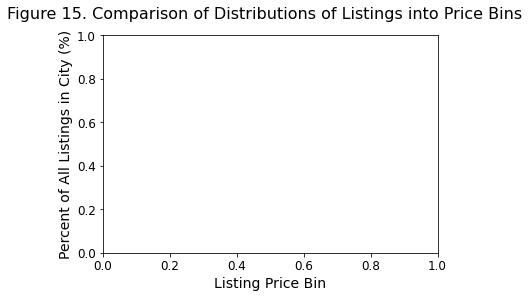

In [148]:
# Count compare ditribution of listings into price bins between cities
price_bin_counts = category_level_pcount(df=listing_properties, column='listing_price_bin',
                                         subgroups=['city'])

fig15, ax15 = plt.subplots(figsize=(6, 4))
sns.catplot(x='listing_price_bin', y='level_pcount', hue='city',
            kind='bar', data=price_bin_counts, ax=ax15)
ax15.set_xlabel('Listing Price Bin')
ax15.set_ylabel('Percent of All Listings in City (%)')
fig15.suptitle('Figure 15. Comparison of Distributions of Listings into Price Bins')
plt.close(2);
display(price_bin_counts)

,city,listing_price_bin,property_type,level_count,subgroup_count,level_pcount
10,Amsterdam,median <= $471.0,House,714,8619,8.284024
9,Amsterdam,median <= $471.0,Apartment,5925,8619,68.743474
0,Berlin,median > $471.0,Apartment,47,78,60.256410
8,Amsterdam,median > $471.0,Boat,22,295,7.457627
5,Berlin,median <= $471.0,Condominium,331,12216,2.709561


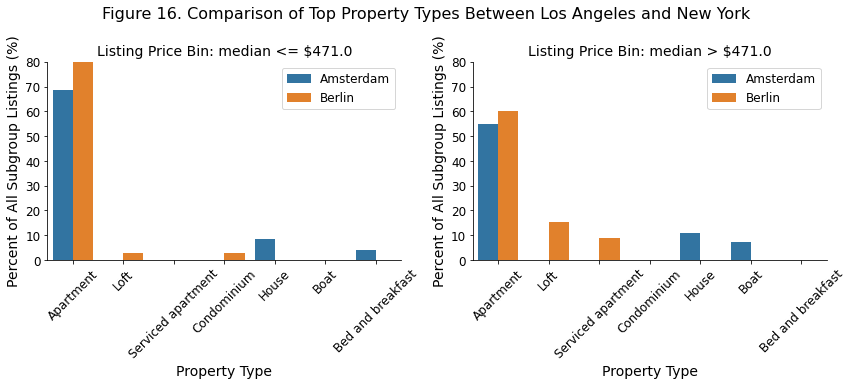

In [149]:
top_property_types = category_level_pcount(df=listing_properties, column='property_type', 
                                           subgroups=subgroups, topk=3)

ax16 = sns.catplot(x='property_type', y='level_pcount', hue='city', col='listing_price_bin',
                   hue_order=cities, col_order=price_bins,
                   kind='bar', data=top_property_types, sharey=False, legend=False, height=5, aspect=1.2)
for ax, price_bin in zip(ax16.axes.flat, price_bins):
    ax.set_title('Listing Price Bin: ' + price_bin)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_ylabel('Percent of All Subgroup Listings (%)')
    ax.set_xlabel('Property Type')
    ax.set_ylim(0, 80)
    ax.legend(loc=1)
ax16.fig.suptitle('Figure 16. Comparison of Top Property Types Between Los Angeles and New York', y=1.07)
ax16.fig.tight_layout();

top_property_types.sample(5, random_state=RANDOM_STATE)

,city,listing_price_bin,room_type,level_count,subgroup_count,level_pcount
9,Amsterdam,median > $471.0,Hotel room,10,295,3.389831
11,Amsterdam,median <= $471.0,Entire home/apt,5916,8619,68.639053
0,Berlin,median > $471.0,Entire home/apt,59,78,75.641026
13,Amsterdam,median <= $471.0,Hotel room,240,8619,2.784546
5,Berlin,median <= $471.0,Hotel room,202,12216,1.653569


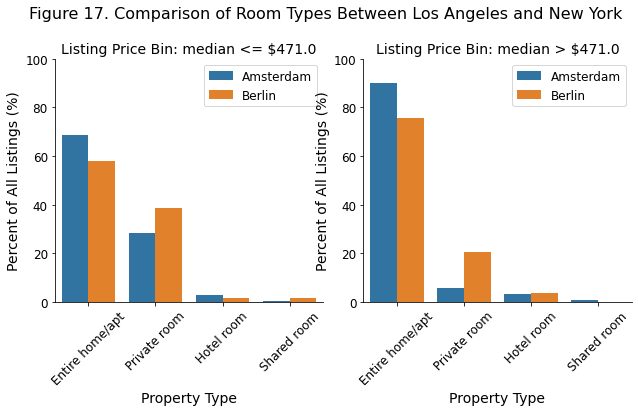

In [150]:
top_room_types = category_level_pcount(df=listing_properties, column='room_type', 
                                       subgroups=subgroups, topk=5)

ax17 = sns.catplot(x='room_type', y='level_pcount', hue='city', col='listing_price_bin',
                   hue_order=cities,  col_order=price_bins, height=4.5, aspect=1,
                   kind='bar', data=top_room_types, sharey=False, legend=False)
for ax, price_bin in zip(ax17.axes.flat, price_bins):
    ax.set_title('Listing Price Bin: ' + price_bin)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_ylabel('Percent of All Listings (%)')
    ax.set_xlabel('Property Type')
    ax.set_ylim(0, 100)
    ax.legend(loc=1)
ax17.fig.suptitle('Figure 17. Comparison of Room Types Between Los Angeles and New York', y=1.07);

top_room_types.sample(5, random_state=RANDOM_STATE)

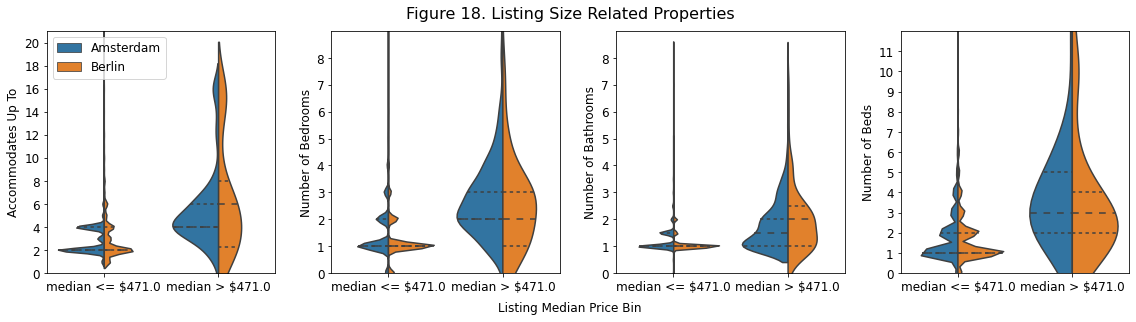

In [151]:
fig18_params = {
        # col_name: (y-axis label, (ticks_start, ticks_end, ticks_step))
        'accommodates': ('Accommodates Up To', (0, 21, 2)),
        'bedrooms': ('Number of Bedrooms', (0, 9, 1)),
        'bathrooms': ('Number of Bathrooms', (0, 9, 1)),
        'beds': ('Number of Beds', (0, 12, 1))}

fig18, ax18 = plt.subplots(1, 4, figsize=(16, 4))

for ax, listing_property in zip(ax18, fig18_params.keys()):
    yaxis_label, (ticks_start, ticks_end, num_ticks) = fig18_params[listing_property]
    ax = sns.violinplot('listing_price_bin', listing_property, inner='quartiles',
                        data=listing_properties, hue='city', ax=ax, split=True, hue_order=cities)
    ticks = np.arange(ticks_start, ticks_end, num_ticks)
    ax.set_yticks(ticks) 
    ax.set_yticklabels(ticks)
    ax.set_xticklabels(price_bins)
    ax.set_ylabel(yaxis_label, fontsize=12)
    ax.set_ylim(ticks_start, ticks_end)
    ax.set_xlabel('')
    ax.get_legend().remove()
ax18[0].legend(loc=2, fontsize=12)
fig18.text(0.5, -0.02, 'Listing Median Price Bin', ha='center')
fig18.tight_layout()
fig18.suptitle('Figure 18. Listing Size Related Properties', y=1.04);

In [152]:
print('Comparison of size related listing properties between Los Angeles and New York.\n')
for listing_property in size_features:
    print(f'{listing_property.title()}:'
          f'\n==========================')
    for price_bin in price_bins:
        df = listing_properties[listing_properties.listing_price_bin==price_bin]
        print(f'Price bin {price_bin}:')
        compare_group_means(df=df, column=listing_property, group='city', test='effect_size')
        print('\n')
    print('--------------------------------------------\n')

Comparison of size related listing properties between Los Angeles and New York.

Accommodates:
Price bin median <= $471.0:


,count,mean,median,std
city,,,,
Amsterdam,8619,2.874231,2,1.242553
Berlin,12216,2.973641,2,1.836803


Difference between groups is -0.0994(3.46%)
Sample distribution is not normal.
0.0455 Cliff's Delta between group means corresponds to small effect size.


Price bin median > $471.0:


,count,mean,median,std
city,,,,
Amsterdam,295,5.606780,4,3.438669
Berlin,78,6.538462,6,4.855556


Difference between groups is -0.9317(16.62%)
Sample distribution is not normal.
0.0346 Cliff's Delta between group means corresponds to small effect size.


--------------------------------------------

Bedrooms:
Price bin median <= $471.0:


,count,mean,median,std
city,,,,
Amsterdam,8619,1.436710,1.0,0.897265
Berlin,12216,1.200884,1.0,0.746285


Difference between groups is 0.2358(16.41%)
Sample distribution is not normal.
0.1495 Cliff's Delta between group means corresponds to small effect size.


Price bin median > $471.0:


,count,mean,median,std
city,,,,
Amsterdam,295,2.874576,2.0,1.658168
Berlin,78,2.628205,2.0,1.948086


Difference between groups is 0.2464(8.57%)
Sample distribution is not normal.
0.1123 Cliff's Delta between group means corresponds to small effect size.


--------------------------------------------

Bathrooms:
Price bin median <= $471.0:


,count,mean,median,std
city,,,,
Amsterdam,8619,1.223866,1.0,0.406535
Berlin,12216,1.119311,1.0,0.376592


Difference between groups is 0.1046(8.54%)
Sample distribution is not normal.
0.1746 Cliff's Delta between group means corresponds to small effect size.


Price bin median > $471.0:


,count,mean,median,std
city,,,,
Amsterdam,295,1.781356,1.5,0.920565
Berlin,78,1.974359,2.0,1.205769


Difference between groups is -0.1930(10.83%)
Sample distribution is not normal.
0.0697 Cliff's Delta between group means corresponds to small effect size.


--------------------------------------------

Beds:
Price bin median <= $471.0:


,count,mean,median,std
city,,,,
Amsterdam,8619,1.796612,1.0,1.440007
Berlin,12216,1.786837,1.0,1.459479


Difference between groups is 0.0098(0.54%)
Sample distribution is not normal.
0.0342 Cliff's Delta between group means corresponds to small effect size.


Price bin median > $471.0:


,count,mean,median,std
city,,,,
Amsterdam,295,4.657627,3.0,4.573073
Berlin,78,3.923077,3.0,3.606521


Difference between groups is 0.7346(15.77%)
Sample distribution is not normal.
0.1683 Cliff's Delta between group means corresponds to small effect size.


--------------------------------------------



Model Results
Figure 16 shows that the lower median price bin listings in New York are predominantly apartments, while in Los Angeles they are closely split between apartments and houses. Half of the high median price listings in New York are still apartments with the other half split between lofts, townhouses and houses. Los Angeles high median price listings, on the other hand, are mostly houses (including large houses, aka villas). This is consistent with the differences in real estate markets between Los Angeles and New York, where most of New York residential real estate is apartments and condominiums.

Figure 17 illustrates that the distribution of room types for both cities is similar -- split between entire homes/apartments and private rooms for lower median-price listings; and predominantly entire homes/apartments for high median-price listings.

Figure 18 and related table demonstrates that lower median price listings (<=\$564.00) are similar in size between Los Angles and New York with median one bedroom, one bathroom, and one bed with per listing. However, more expensive listings are in all respects larger in Los Angeles where median listing is able to accommodate up to 8 people in 4 bedrooms, 3.5 bathrooms and 4 beds versus New York where median listing is able to accommodate up to 6 people in 3 bedrooms, 2 bathrooms and 3 beds.

Model Evaluation
We have calculated the differences in listing sizes between the two cities. But how significant were those differences? After performing the Cliff's delta test estimating effect significance (see tables above) we demonstrated that there are no significant differences in property sizes for median prices listings <= \$564 between Los Angeles and New York. On the other hand, for median prices listings > \$564, properties in Los Angeles appear to be significantly larger in number of people a property can accommodate, the number of bedrooms, beds, and bathrooms.

**Pregunta 2: ¿Hay diferencias en las comodidades ofrecidas?**

In [0]:
# count number of listing amenities for each listing
amenities_df['count'] = amenities_df.sum(axis=1)

In [0]:
# add price bin and city column for analysis
amenities_df = amenities_df.merge(listing_properties[subgroups], on='id')

In [155]:
amenities_df.head()

,toilet,24-hour_check-in,accessible-height_bed,accessible-height_toilet,air_conditioning,air_purifier,amazon_echo,baby_bath,baby_monitor,babysitter_recommendations,baking_sheet,balcony,barbecue_utensils,bath_towel,bathroom_essentials,bathtub,bathtub_with_bath_chair,bbq_grill,beach_essentials,beach_view,beachfront,bed_linens,bedroom_comforts,bidet,body_soap,bread_maker,breakfast,breakfast_table,building_staff,buzzer/wireless_intercom,cable_tv,carbon_monoxide_detector,cat(s),ceiling_fan,changing_table,children’s_books_and_toys,children’s_dinnerware,cleaning_before_checkout,coffee_maker,convection_oven,cooking_basics,crib,day_bed,disabled_parking_spot,dishes_and_silverware,dishwasher,dog(s),doorman,double_oven,dryer,...,rain_shower,refrigerator,room-darkening_shades,safety_card,self_check-in,shampoo,shower_chair,shower_gel,single_level_home,ski-in/ski-out,smart_lock,smart_tv,smoke_detector,smoking_allowed,soaking_tub,sound_system,stair_gates,stand_alone_steam_shower,standing_valet,steam_oven,step-free_shower,stove,suitable_for_events,sun_loungers,table_corner_guards,terrace,toilet_paper,translation_missing:_en.hosting_amenity_49,translation_missing:_en.hosting_amenity_50,trash_can,tv,walk-in_shower,warming_drawer,washer,washer/dryer,waterfront,well-lit_path_to_entrance,wheelchair_accessible,wide_clearance_to_shower,wide_doorway_to_guest_bathroom,wide_entrance,wide_entrance_for_guests,wide_entryway,wide_hallways,wifi,window_guards,wine_cooler,count,city,listing_price_bin
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2818,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,33,Amsterdam,median <= $471.0
3176,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,19,Berlin,median <= $471.0
3309,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,24,Berlin,median <= $471.0
7071,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,15,Berlin,median <= $471.0
9991,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,1,1,0,0,1,1,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,37,Berlin,median <= $471.0


Comparison of number of listed amenities between Los Angeles and New York.
Number of Amenities:
Price bin median <= $471.0:


,count,mean,median,std
city,,,,
Amsterdam,8619,23.557489,23,9.293481
Berlin,12216,21.395792,21,9.595893


Difference between groups is 2.1617(9.18%)
Sample distribution is not normal.
0.1423 Cliff's Delta between group means corresponds to small effect size.


Price bin median > $471.0:


,count,mean,median,std
city,,,,
Amsterdam,295,27.433898,28,10.923740
Berlin,78,23.884615,21,12.802172


Difference between groups is 3.5493(12.94%)
Sample distribution is not normal.
0.2146 Cliff's Delta between group means corresponds to medium effect size.


--------------------------------------------



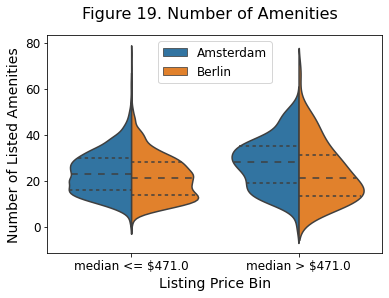

In [156]:
print('Comparison of number of listed amenities between Los Angeles and New York.\n'
      f'Number of Amenities:'
      f'\n==========================')
for price_bin in price_bins:
    df = amenities_df[amenities_df.listing_price_bin==price_bin]
    print(f'Price bin {price_bin}:')
    compare_group_means(df=df, column='count', group='city', test='effect_size')
    print('\n')
print('--------------------------------------------\n')

fig19, ax19 = plt.subplots()

sns.violinplot(x='listing_price_bin', y='count', data=amenities_df, hue='city', hue_orer=cities,
               split=True, inner='quartile', ax=ax19)
ax19.set_xlabel('Listing Price Bin')
ax19.set_ylabel('Number of Listed Amenities')
ax19.legend(loc=9)
fig19.suptitle('Figure 19. Number of Amenities');

Model Results
Figure 19 shows that hosts in Los Angeles list about 4 more amenities on average than hosts in New York.

Model Evaluation
The table comparing number of listing amenities shows that the difference has a medium size effect (somewhat significant) for lower price listings (price bin <= \$564). On the other hand, the broader distribution of larger price listings diminishes the significance of the difference to low size effect.

Finally, let's look at the most listed amenities in both cities:

In [166]:
amenities_topk = 5  # list only topk

# most frequently listed amenities for each city, listing_price_bin subgroup
top_amenities = amenities_df.drop(columns=['count'])\
.groupby(subgroups).sum(axis=1).stack()\
.groupby(subgroups, group_keys=False).nlargest(amenities_topk)\
.reset_index().rename(columns={'level_2': 'amenity', 0: 'count'})\
.merge(price_bin_counts[subgroups + ['level_count']], on=subgroups)
top_amenities['pcount'] = 100.0 * top_amenities['count'] / top_amenities['level_count']
top_amenities.head()

TypeError: ignored

In [165]:
# Order amenities in descending order by the average between two cities percentage count for each price bin
top_amenities_order = top_amenities.groupby(['amenity', 'listing_price_bin'])\
                                   .agg(pcount_ave=('pcount', 'mean'))\
                                   .sort_values(['listing_price_bin', 'pcount_ave'], 
                                                ascending=[True,False])\
                                   .reset_index()

top_amenities_order

KeyError: ignored

NameError: ignored

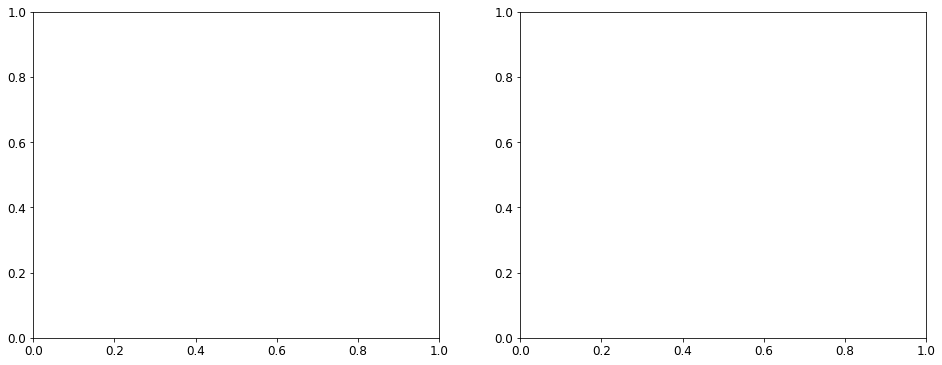

In [167]:
fig20, ax20 = plt.subplots(1, 2, figsize=(16, 6))
for ax, price_bin in zip(ax20, price_bins):
    data = top_amenities[top_amenities.listing_price_bin==price_bin]
    order = top_amenities_order[top_amenities_order.listing_price_bin==price_bin]['amenity']
    sns.barplot(x='amenity', y='pcount', hue='city', hue_order=cities, order=order, 
                data=data, ax=ax)
    ax.set_title('Listing Price Bin: ' + price_bin)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_ylabel('Mentioned in Percent of All Listings\nfor Price/City Subgroup(%)')
    ax.set_xlabel('Amenity')
    ax.set_ylim(80, 100)
    ax.legend(loc=1)
fig20.suptitle(f'Figure 20. Comparison of Top {amenities_topk} '
                  f'Amenities Between Los Angeles and New York', y=1.07)
fig20.tight_layout();

**Pregunta 3: ¿Las diferencias anteriores se reflejan en las diferencias de precios del listado?**

> Bloque con sangría



Comparison of listing average prices between Los Angeles and New York.

Price Mean:
----------------------------
Price bin median <= $471.0:


,count,mean,median,std
city,,,,
Amsterdam,8619,174.745189,152.534626,88.468474
Berlin,12216,80.150145,62.000000,62.493564


Difference between groups is 94.5950(54.13%)
Sample distribution is not normal.
0.7265 Cliff's Delta between group means corresponds to large effect size.


Price bin median > $471.0:


,count,mean,median,std
city,,,,
Amsterdam,295,710.393943,585.941828,562.613050
Berlin,78,957.321756,581.423823,1175.699922


Difference between groups is -246.9278(34.76%)
Sample distribution is not normal.
0.0886 Cliff's Delta between group means corresponds to small effect size.


Price Mean Per Bedroom:
----------------------------
Price bin median <= $471.0:


,count,mean,median,std
city,,,,
Amsterdam,8105,128.432466,117.240997,65.107753
Berlin,11155,63.393780,52.157895,45.715526


Difference between groups is 65.0387(50.64%)
Sample distribution is not normal.
0.7183 Cliff's Delta between group means corresponds to large effect size.


Price bin median > $471.0:


,count,mean,median,std
city,,,,
Amsterdam,295,338.511141,249.480609,523.785319
Berlin,73,597.059944,248.596953,1230.720659


Difference between groups is -258.5488(76.38%)
Sample distribution is not normal.
0.0800 Cliff's Delta between group means corresponds to small effect size.




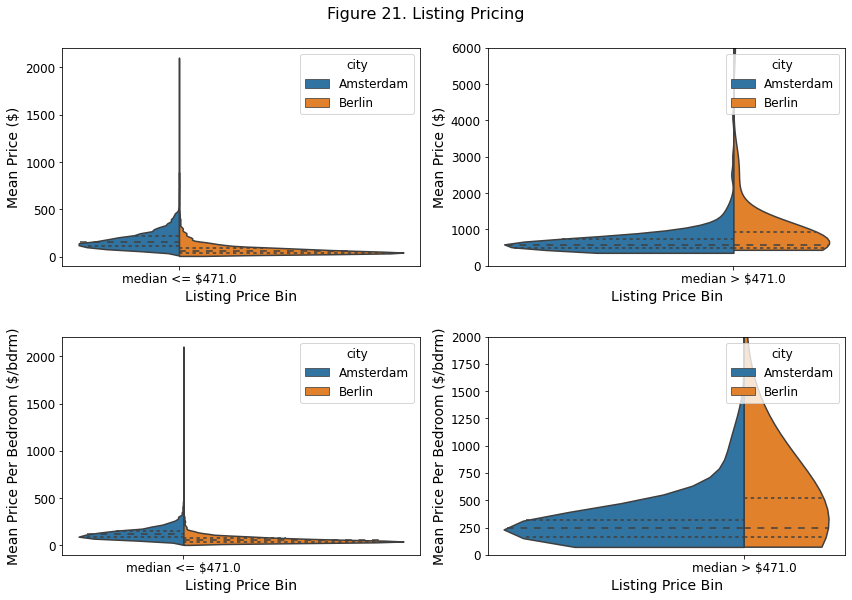

In [168]:
fig21, ax21 = plt.subplots(2, 2, figsize=(12, 8))

ax21 = ax21.flat
idx = 0
for price_type, y_label in zip(['price_mean', 'price_mean_per_bedroom'],
                              ['Mean Price ($)', 'Mean Price Per Bedroom ($/bdrm)']):
    for price_bin in price_bins:
        ax = ax21[idx]
        data = listing_properties[listing_properties.listing_price_bin==price_bin]
        data = data.replace([np.inf, -np.inf], np.nan).dropna(subset=[price_type], how='any', axis=0)
        ax = sns.violinplot(x='listing_price_bin', y=price_type, hue='city',
                            data=data, inner='quartile', split=True, cut=0, hue_order=cities, ax=ax)
        ax.set_ylabel(y_label)
        ax.set_xlabel('Listing Price Bin', fontsize=14)
        idx += 1

ax21[1].set_ylim(0, 6000)
ax21[3].set_ylim(0, 2000)
fig21.suptitle('Figure 21. Listing Pricing', y=1.04)
fig21.tight_layout();

print('Comparison of listing average prices between Los Angeles and New York.\n')
for price in ['price_mean', 'price_mean_per_bedroom']:
    print(f'{price.replace("_", " ").title()}:'
          f'\n----------------------------')
    for price_bin in price_bins:
        df = listing_properties[listing_properties.listing_price_bin==price_bin]
        print(f'Price bin {price_bin}:')
        compare_group_means(df=df, column=price, group='city', test='effect_size')
        print('\n')

Model Results
Figure 21 and the related table show that relative listing property sizes translate fairly well into the listing mean prices: less expensive listings (below \$564 median price) are very similar between Los Angeles and New York with < 5\% higher overall median price in New York, while the higher proportion of larger listings in Los Angeles results in ~30\% higher overall mean listing price for more expensive listings (above \$564 median price range). Note, however, that if we take the size of the listing out of the equation and look at the mean price per bedroom, it turns out that size normalized high priced listings in Los Angeles are actually 18\% cheaper than New York!

Thus, if you are looking for a luxury vacation and don't mind paying a bit extra for considerably larger accommodations, then Los Angeles gives you more bang for your buck and is the place to go.

Model Evaluation
Looking at the Cliff's delta values for various comparisons in the table above, we note that the only average price difference between cities with statistically significant size effect is the raw average price for high-price listings (median price > \$564) with a medium size effect. All other differences are not statistically significant according to this metric.

**¿Cuáles son las mejores fechas para visitar cada ciudad en términos de precio y disponibilidad?**

In [0]:
def generate_daily_ave_trends(calendar, values=['price', 'availability'], 
                              subgroups=['city', 'listing_price_bin']):
    
    """Return frame containing **daily** raw average and percent deviation from subgroup mean trends
       for each column for each subgroup.
    
    Args:
        calendar(pd.DataFrame): Contains daily records of values for each column in `columns` arg
                            n addition to column names found in func args(columns, subgroups,
                                fixed_over_col), must contain date column
        values([str]): column names for which average trends are to be generated
        subgroups([str]): list of subgrouping column names
                           
    Returns:
        trend(pd.DataFrame): Containing average price trends for each city and price bin subgroup
                                   Columns:
                                   - date
                                   - subgroups
                                   - col_subgroup_ave: average col value for subgroup over the entire time
                                   - col_date_subgroup_ave: average col value for subgroup for each day
                                   - col_pdev: daily col percent deviation from overall subgroup average
    """
    assert 'date' in calendar.columns, 'Error: date column could not be found'
    
    df = calendar
    
    # Overall mean value for columns for each subgroup
    subgroup_ave = df.groupby(subgroups)[values].mean().reset_index()\
                     .rename(columns={col: col + '_subgroup_ave' for col in values})
    
    # Daily mean value for columns for each subgroup
    date_subgroup_ave = df.groupby(['date'] + subgroups)[values].mean().reset_index()\
                          .rename(columns={col: col + '_daily_subgroup_ave' for col in values})
    
    # Merge overall and daily means by subgroups
    trend = subgroup_ave.merge(date_subgroup_ave, on=subgroups)
    
    # Add percent deviation from overall subgroup mean
    for col in values:
        trend[col + '_daily_pdev'] = (100.0 * (trend[col + '_daily_subgroup_ave'] 
                                               - trend[col + '_subgroup_ave']) 
                                      / trend[col + '_subgroup_ave'])
    
    return trend

In [0]:
holidays = {'Thanksgiving': np.datetime64('2018-11-22'),
            'Christmas': np.datetime64('2018-12-25'),
            'New Year': np.datetime64('2019-01-01'),
            'Memorial Day': np.datetime64('2019-05-27'),
            'Labor Day': np.datetime64('2019-09-02')}

def exclude_holiday_weeks(calendar, holidays=holidays):
    """Drops weeks from input calendar that have major US holidays
       or weeks preceeding holidays if holiday falls on Monday or Tuesday.
       
    Args:
        calendar(pd.DataFrame): input calendar dataframe containing `date` column
        holidays({name: np.datetime64}): dict containing holiday names and dates in numpy.datetime64 format
        
    Returns:
        df(pd.DataFrame): output calendar with weeks containing holidays dropped
    """
    df = calendar.copy()
    
    df['week'] = df.date.dt.week  # add week number column to calendar
    
    excluded_weeks = []  # list of week numbers to exclude from weekend/weekday difference analysis
    
    for _, date in holidays.items():
        pd_date = pd.to_datetime(date)  # convert np.datetime64 to pd.date
    
        # exclude holiday week
        holiday_week = pd_date.week  
        excluded_weeks.append(holiday_week)

        # exclude preceeding holiday week if holiday is on Monday or Tuesday
        holiday_day_of_week = pd_date.dayofweek
        if holiday_day_of_week < 2:
            excluded_weeks.append(holiday_week - 1)
    
    df = df[~df.week.isin(excluded_weeks)] 
    
    return df

In [0]:
def drop_fixed_value_groups(df, values, by):
    """Drop fixed-value groups from input dataframe
    
    Args:
        df(pd.DataFrame): input dataFrame
        column(str): column containing values to be examined for variability
        group_key(str): column containing group keys
    
    Return:
        df_out(pd.DataFrame): output dataFrame with removed fixed_value groups   
     
    Example:
    IN:
        df = pd.DataFrame(np.array([[1, 2, A], [4, 2, A], [7, 2, A], 
                                    [3, 4, B], [5, 6, B], [7, 2, B],
                                    [1, 2, C], [1, 3, C], [1, 4, C]]),
                          columns=['col1', 'col2', 'col3'])            
        df
    OUT:
           col1  col2  col3
        0   1     2     A
        1   4     2     A
        2   7     2     A
        3   3     4     B
        4   5     6     B
        5   7     2     B
        6   1     1     C
        7   1     3     C
        8   1     4     C
    
    IN:
        df2 = drop_fixed_value_groups(df, values='col2', by='col3')
        df2
    
    OUT:
           col1  col2  col3
        3   3     4     B
        4   5     6     B
        5   7     2     B    
        6   1     1     C
        7   1     3     C
        8   1     4     C    
    
    """
    agg = df.groupby(by)[values].nunique()
    fixed_value_group_keys = agg[agg==1].index.values
    df = df[~df[by].isin(fixed_value_group_keys)]
    
    return df


In [0]:
def weekend_weekday_diff(calendar, value_col, subgroups=['city', 'listing_price_bin']):
    """Return difference in prices for each week of the calendar for each subgroup
    
    Args:
        calendar(pd.DataFrame): input calendar containing dates, prices and subgroups.
                                Required columns:
                                - date
                                - price
                                - subgrouping columns
        price_col(str): column name containing prices used for comparison                        
        subgroups([str]): list of grouping column names
        
    Returns:
        weekly(pd.DataFrame): average percent difference in weekend-weekday prices
                              for each subgroup for each calendar week
    """
    df = calendar.copy()
    
    # add week number column to calendar, keeping track of the year
    df['week'] = df.date.dt.strftime('%Y-%W')
    
    # add column indicating weekend/weekday
    # Weekend prices actually correspond to Friday (dayofweek=4) and Saturday(dayofweek=5) bookings!!!
    df['weekend'] = np.where((pd.DatetimeIndex(df.date).dayofweek==4) 
                             | (pd.DatetimeIndex(df.date).dayofweek==5), 1, 0)
    
    group_cols = subgroups + ['week', 'weekend']
    index_cols = subgroups + ['week']
    
    # calculate subgroup mean prices for weekdays and weekends for each week
    weekly = df.groupby(group_cols)\
               .agg(ave_price=(value_col, 'mean')).reset_index()\
               .pivot_table(values='ave_price', columns='weekend', index=index_cols).reset_index()\
               .rename(columns={0: 'weekday_price_ave', 1: 'weekend_price_ave'})
    
    # convert absolute difference into percent difference from weekday price
    weekly['price_pdiff'] = (100.0 * (weekly.weekend_price_ave - weekly.weekday_price_ave) 
                             / weekly.weekday_price_ave)
    
    return weekly


In [0]:
def weekend_weekday_diff_pipeline(calendar, subgroups=['city', 'listing_price_bin'],
                                  exclude_fixed_price=False,
                                  exclude_holidays=True, holidays={}):
    
    """Analysis pipeline for evaluating weekend-weekday price differences by input subgroups
    
    Args:
        calendar (pd.DataFrame): calendar frame containing dialy pricing for each listing with
                                 the following required columns: 
                                     'price', 'listing_id', 'city', 'listing_price_bin'
        exclude_fixed_price (bool): exclude listings with fixed price from analysis if True, 
                                    include otherwise
        exclude_holidays
        
    Returns:
        weekly (pd.DataFrame): frame containing weekly weekend-weekday difference 
                               with the following columns:
                                   weekend (float): year week number 
                                   city (str)
                                   listing_price_bin (str)
                                   week (str): week number in YYYY-week number format
                                   weekday_price_ave (float): weekday subgroup average price for the week
                                   weekend_price_ave (float): weekend subgroup average price for the week
                                   price_pdiff (float): weekly weekend-weekday price percent difference =
                                                        100 * (weekend_price_ave - weekday_price_ave) /
                                                               weekday_price_ave
    """
    
    if exclude_fixed_price:
        df = drop_fixed_value_groups(df=calendar, values='price', by='listing_id')
    else:
        df = calendar
        
    trend = generate_daily_ave_trends(calendar=df, values=['price'], 
                                      subgroups=['city', 'listing_price_bin'])
    if exclude_holidays:
        trend = exclude_holiday_weeks(calendar=trend, holidays=holidays)
        
    weekly = weekend_weekday_diff(calendar=trend, value_col='price_daily_subgroup_ave', 
                                           subgroups=subgroups)
    
    return weekly


We're finally ready for the analysis. Let's start by plotting listing availability and price trends through the year comparing relative fluctuations in Los Angeles and New York using data from all listings.



In [174]:
trend_all = generate_daily_ave_trends(calendar=calendar, values=['price', 'available'], 
                                      subgroups=subgroups)

trend_all.sample(5, random_state=RANDOM_STATE)

,city,listing_price_bin,price_subgroup_ave,available_subgroup_ave,date,price_daily_subgroup_ave,available_daily_subgroup_ave,price_daily_pdev,available_daily_pdev
413,Amsterdam,median > $471.0,710.527748,0.578348,2020-05-08,727.287162,0.560811,2.358728,-3.032362
316,Amsterdam,median <= $471.0,174.246814,0.286644,2021-01-27,171.022764,0.292136,-1.850278,1.915992
1034,Berlin,median <= $471.0,79.863625,0.402831,2021-01-23,82.002984,0.361342,2.678764,-10.299294
65,Amsterdam,median <= $471.0,174.246814,0.286644,2020-05-21,176.609106,0.259140,1.355716,-9.595181
1024,Berlin,median <= $471.0,79.863625,0.402831,2021-01-13,80.325054,0.361261,0.577771,-10.319312


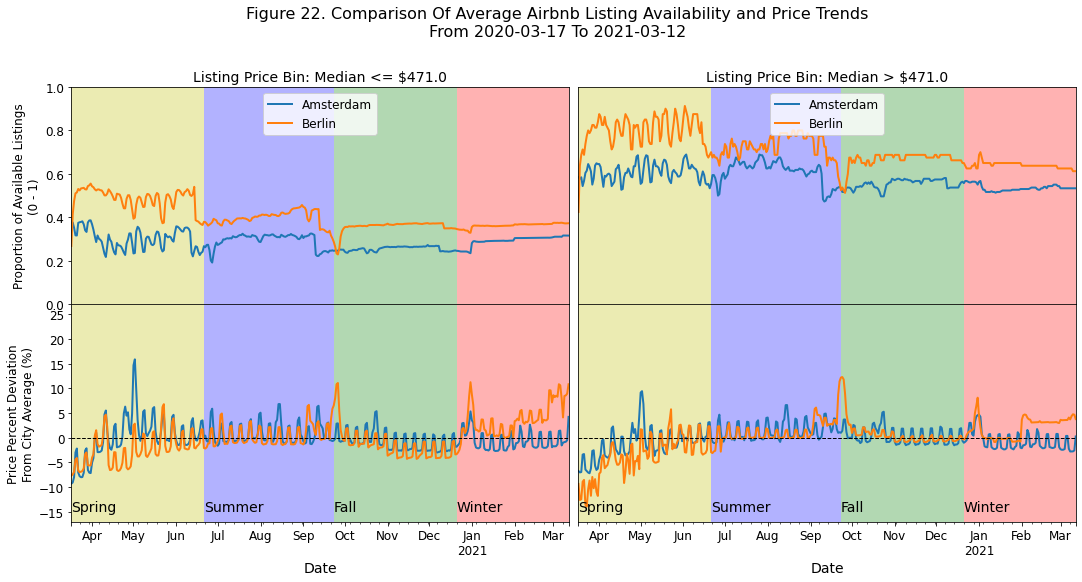

In [201]:
fig22 = plt.figure(figsize=(18, 8), constrained_layout=False)

# Setup grid layout
outer_grid = fig22.add_gridspec(1, 2, wspace=0.02, hspace = 0)
for i in range(2):
    inner_grid = outer_grid[i].subgridspec(2, 1, wspace=0, hspace=0)
    for j in range(2):
        fig22.add_subplot(inner_grid[j])

# Get axes
ax22 = fig22.get_axes()

# Plot for each price bin
for idx, price_bin in enumerate(price_bins):
    
    # Graph index shortcuts
    ax_av = ax22[2 * idx]  # avilability graph
    ax_price = ax22[2 * idx + 1]  # price graph
    
    # Axes transform for text labels
    transform_av = ax_av.get_xaxis_transform()  
    transform_price = ax_price.get_xaxis_transform()  
    
    # Plot availability and price trends for each city
    for city, color in zip(cities, ['C0', 'C1']):
        
        # Subset data
        data = trend_all[(trend_all.listing_price_bin==price_bin) & (trend_all.city==city)]
        
        # Plot Listing Availability
        data.plot(x='date', y='available_daily_subgroup_ave', color=color, linewidth=2, ax=ax_av)
        
        # Plot Price Percent Deviation from City Mean Price
        data.plot(x='date', y='price_daily_pdev', color=color, legend=False, linewidth=2, 
                  ax=ax_price)    
        
    # Decorate axes, legends, titles
    ax_av.set_title(f'Listing Price Bin: {price_bin.capitalize()}')
    ax_av.legend([x.title() for x in cities], loc=9)
    ax_av.axes.get_xaxis().set_visible(False)
    ax_av.set_ylim(0, 1)
    ax_price.set_xlabel('Date')
    ax_price.set_ylim(-17, 27)
    
    # Add dashed line at 0% price deviation
    ax_price.axhline(y=0, color='k', linestyle='dashed', linewidth=1)

    # Shade seasonal regions
    # Seaons start around 20th of the months instead of the 1st [6]
    season_cuts = [data.date.min().date(),
                   np.datetime64('2020-06-21'),
                   np.datetime64('2020-09-23'), 
                   np.datetime64('2020-12-21'),
                   np.datetime64('2021-03-20'),
                   data.date.max().date()]
    season_colors = ['y', 'b', 'g', 'r', 'y']
    
    for start, end, season_color in zip(season_cuts[:-1], season_cuts[1:], season_colors):
        ax_av.axvspan(start, end, facecolor=season_color, alpha=0.3)
        ax_price.axvspan(start, end, facecolor=season_color, alpha=0.3)

    # Add season labels
    for name, offset in zip(['Spring', 'Summer', 'Fall', 'Winter'], season_cuts[:-1]):
        ax_price.text(offset, 0.05, name, rotation=0, color='k', transform=transform_price, fontsize=14)

# Clean up ticks and labels
ax22[0].set_ylabel('Proportion of Available Listings\n(0 - 1)', fontsize=12)
ax22[1].set_ylabel('Price Percent Deviation\nFrom City Average (%)', fontsize=12)
ax22[2].set_yticks([])
ax22[3].set_yticks([])
fig22.suptitle(f'Figure 22. Comparison Of Average Airbnb Listing Availability and Price Trends'
               f'\nFrom {data.date.min().date()} '
               f'To {data.date.max().date()}', y=1.02);
